In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### diabetic_data

In [2]:
diabetes_df = pd.read_csv('diabetic_data.csv')
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
diabetes_df = diabetes_df.replace(to_replace = ['?'], value = np.nan)

In [5]:
# number of object type features

len(diabetes_df.select_dtypes('object').columns)

37

In [6]:
diabetes_df['readmitted'].value_counts()/len(diabetes_df)

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

In [7]:
df_len = len(diabetes_df)

In [8]:
diabetes_df.isnull().sum()[diabetes_df.isnull().sum()>0]/df_len*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

In [9]:
diabetes_df.weight.unique()

array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

## Exploratory Data Analaysis

#### For null value imputation, outlier treatments and other pre-processing steps we need to look into our data and take appropriate action according to every features uniquely.

In [10]:
#this function returns a dataframe that contains the perccentage of each category of a particular feature that got readmitted
def category_ratio(feature):
    dic = {}
    for x in diabetes_df[feature].unique():
        num = len(diabetes_df[(diabetes_df[feature]==x) & (diabetes_df['readmitted']==1)])
        den = len(diabetes_df[diabetes_df[feature]==x])
        dic[x] = (num/den)*100
    data = pd.DataFrame.from_dict(dic,orient='index',columns=['%age belonging to class 1'])
    return data.sort_values(by=['%age belonging to class 1'], ascending=False)

# this function return a dataframe with total observations for each category within a feature
def val_counts(df, feature):
    dic = {}
    for x in df[feature].unique():
        dic[x] = [len(df[df[feature]==x]) , (len(df[df[feature]==x])/len(df))*100]
    data = pd.DataFrame.from_dict(dic,orient='index', columns=['Total observations','%age of total data'])
    return data.sort_values(by=['Total observations'], ascending=False)

#### 

In [11]:
dependent_var = diabetes_df['readmitted']
dependent_var.head()

0     NO
1    >30
2     NO
3     NO
4     NO
Name: readmitted, dtype: object

0    90409
1    11357
Name: readmitted, dtype: int64


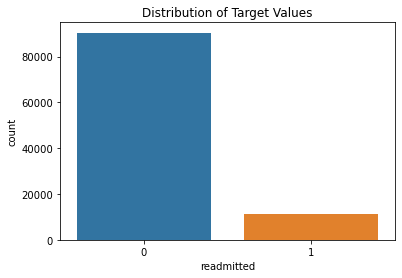

0 - No                     - 88.84008411453728

1 - readmitted(<30 or >30) - 11.159915885462727


In [12]:
diabetes_df = diabetes_df.replace({"NO":0,
                         "<30":1,
                         ">30":0})

print(diabetes_df['readmitted'].value_counts())

sns.countplot(x = "readmitted", data = diabetes_df)
plt.title("Distribution of Target Values")
plt.show()


target = diabetes_df['readmitted'].value_counts(normalize = True)*100

print('0 - No                     -', target[0])
print()
print('1 - readmitted(<30 or >30) -', target[1])

##### Now as we can observe, only 11.16 % of total encountered patients got readmitted within 30 days and hence it is an imabalanced dataset

### 

In [13]:
cols = diabetes_df.columns.values
s_df_1 = diabetes_df[cols[:10]]
s_df_2 = diabetes_df[cols[10:20]]
s_df_3 = diabetes_df[cols[20:30]]
s_df_4 = diabetes_df[cols[30:-1]]

s_df_1['readmitted'] = diabetes_df['readmitted']
s_df_2['readmitted'] = diabetes_df['readmitted']
s_df_3['readmitted'] = diabetes_df['readmitted']
s_df_4['readmitted'] = diabetes_df['readmitted']

In [14]:
s_df_4

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
101762,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
101763,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
101764,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0


Text(0.5, 1.0, 'Feature correlation subset_1')

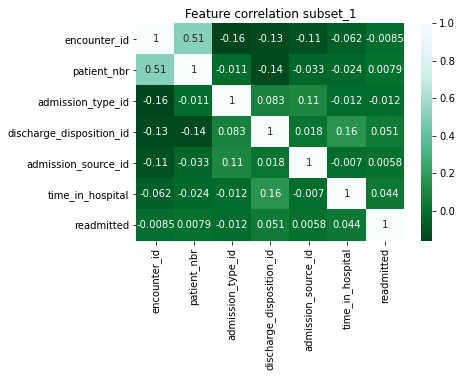

In [15]:
sns.heatmap(s_df_1.corr(), annot=True, cmap='BuGn_r')
plt.title('Feature correlation subset_1')

* time_in_hospsital is slightly correlated with discharge_disposition_id
* encounter_id and patient_nbr are merely a unique identity so we do not care about that.
* admission_source_id has some correlation with admission_type_id

Text(0.5, 1.0, 'Feature correlation subset_2')

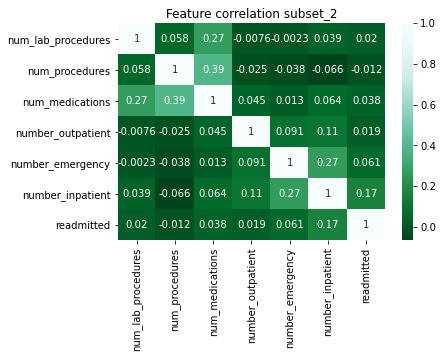

In [16]:
sns.heatmap(s_df_2.corr(), annot=True, cmap='BuGn_r')
plt.title('Feature correlation subset_2')

* num_lab_procedures has good correlation with nu_medication.
* number_emergency is a little bit correlated with number_inpatient

Text(0.5, 1.0, 'Feature correlation subset_3')

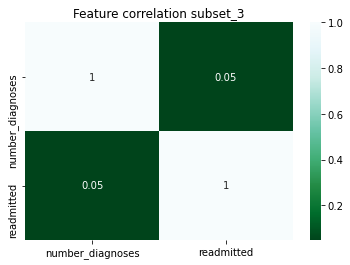

In [17]:
sns.heatmap(s_df_3.corr(), annot=True, cmap='BuGn_r')
plt.title('Feature correlation subset_3')

In [18]:
independent_var = diabetes_df.drop('readmitted', axis = 1)
independent_var.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,No,Yes
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [19]:
independent_var.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [20]:
len(diabetes_df['encounter_id'].unique())

101766

In [21]:
len(diabetes_df['patient_nbr'].unique())

71518

In [22]:
# There are alot of unique values in 'encounter_id' and 'patient_nbr', so we are going to drop that copnsidering it an 
# insignificant feture

In [23]:
diabetes_df.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

## 

### Independent Variable :

#### Race

In [24]:
diabetes_df['race'].mode()[0]

'Caucasian'

In [25]:
 diabetes_df['race'] = diabetes_df['race'].fillna(diabetes_df['race'].mode()[0])

In [26]:
diabetes_df['race'].isna().sum()

0

In [27]:
diabetes_df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

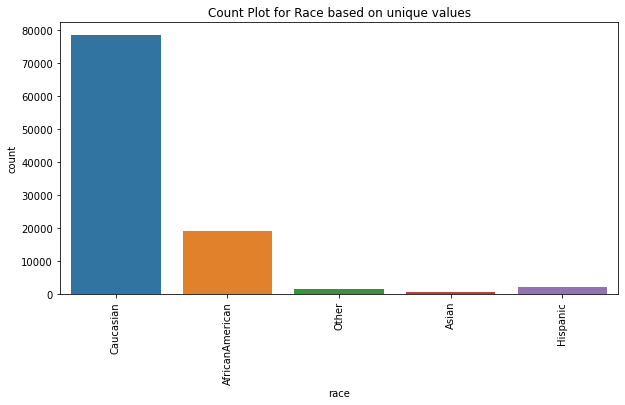

Value count of each Race
Caucasian          77.011969
AfricanAmerican    18.876639
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64


In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='race', data = diabetes_df)
plt.xticks(rotation=90)
plt.title("Count Plot for Race based on unique values")
plt.show()

print("Value count of each Race")

print(diabetes_df.race.value_counts(normalize = True)*100)

#### Mazority of people belong to Caucasian race which 77% for the of the data and aproximately 18.9% are AfricanAmerican and rest of there races density are so samll tat we can categores it as others because it only consist of 4.1% of the data.

#### To to get a more clear visuallisation we can conver it in there general catogeties of races, i.e, Caucasian, AfricanAmerican, Other.

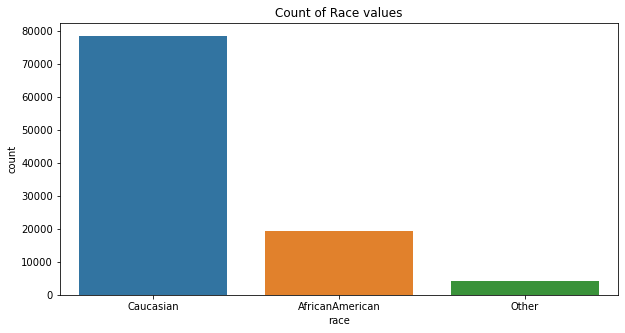

Proportion of each Race After the Mapping
Caucasian          77.011969
AfricanAmerican    18.876639
Other               4.111393
Name: race, dtype: float64


In [29]:
mapping_dict = {"Asian":"Other","Hispanic":"Other"}
diabetes_df['race'] = diabetes_df['race'].replace(mapping_dict)

plt.figure(figsize=(10,5))
sns.countplot(x="race", data = diabetes_df)
plt.title("Count of Race values")
plt.show()

print("Proportion of each Race After the Mapping")
print(diabetes_df['race'].value_counts(normalize= True)*100)

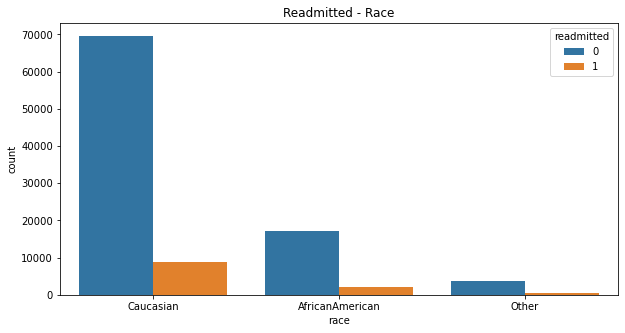

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="race", hue= "readmitted", data = diabetes_df)
plt.title("Readmitted - Race")
plt.show()

<Figure size 720x360 with 0 Axes>

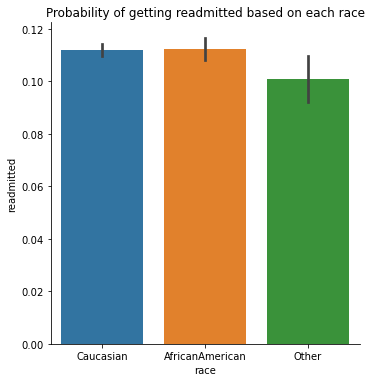

readmitted  race           
0           Caucasian          68.384333
            AfricanAmerican    16.759035
1           Caucasian           8.627636
0           Other               3.696716
1           AfricanAmerican     2.117603
            Other               0.414677
dtype: float64


<AxesSubplot:xlabel='race', ylabel='count'>

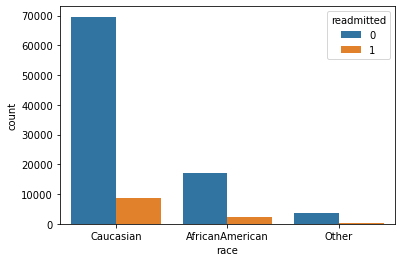

In [31]:
plt.figure(figsize=(10,5))
sns.catplot(x = 'race', y = 'readmitted',
            data = diabetes_df, kind= 'bar')
plt.title("Probability of getting readmitted based on each race")
plt.show()

print(diabetes_df[['readmitted', 'race']].value_counts(normalize= True)*100)

sns.countplot(x = "race", hue = "readmitted", data = diabetes_df)

#### Caucian's are more prone to getting readmitted and AfricanAmerican have almost same probablity of getting readmitted . 

#### Other those fall in 'Others' are found to me less but once we visualise the readmittion probablity we can see that they alos very high readmittion probablity. 

# 

#### Gender

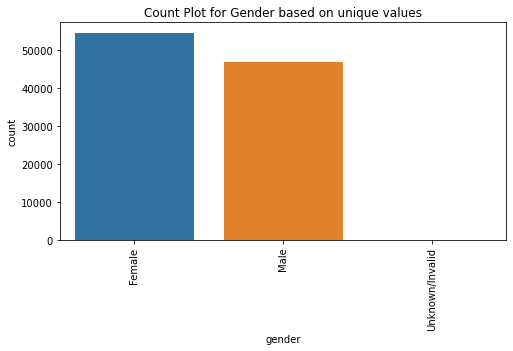

Distribution of Gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64


In [32]:
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data = diabetes_df)
plt.xticks(rotation=90)
plt.title("Count Plot for Gender based on unique values")
plt.show()

print("Distribution of Gender")

print(diabetes_df.gender.value_counts(normalize = True)*100)

In [33]:
diabetes_df[diabetes_df['gender'] == 'Unknown/Invalid']

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
30506,Other,Unknown/Invalid,[70-80),NaN,3,1,1,1,NaN,Cardiology,...,No,No,No,No,No,No,No,Ch,Yes,0
75551,Caucasian,Unknown/Invalid,[60-70),NaN,1,1,7,1,CP,NaN,...,No,No,No,No,No,No,No,No,No,0
82573,Caucasian,Unknown/Invalid,[70-80),NaN,1,22,7,8,CP,NaN,...,No,No,No,No,No,No,No,Ch,Yes,0


#### There are only three entry with 'Unknown/Invalid' values. So we are going to drop them for a clear understanding. 

In [34]:
diabetes_df = diabetes_df.drop(diabetes_df.loc[diabetes_df.gender=="Unknown/Invalid"].index, axis=0)

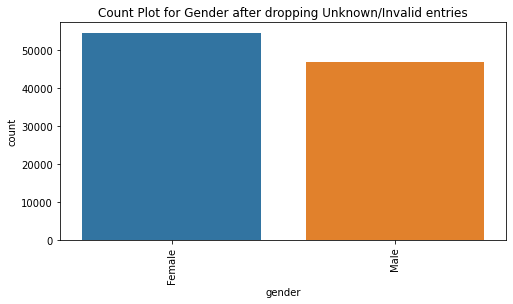

Distribution of Gender after dropping Unknown/Invalid entries
Female    53.760208
Male      46.239792
Name: gender, dtype: float64


In [35]:
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data = diabetes_df)
plt.xticks(rotation=90)
plt.title("Count Plot for Gender after dropping Unknown/Invalid entries")
plt.show()

print("Distribution of Gender after dropping Unknown/Invalid entries")

print(diabetes_df.gender.value_counts(normalize = True)*100)

##### Performing Bi-variate analysis between independent variable and dependent variable 

### Gender - Readmitter 

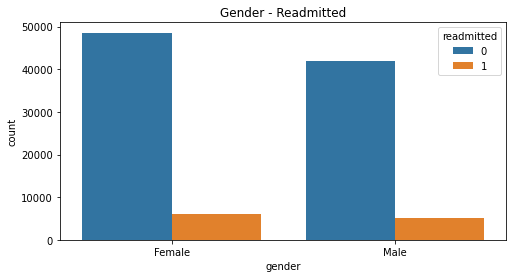

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(x = "gender", hue = "readmitted", data = diabetes_df)
plt.title("Gender - Readmitted")
plt.show()

<Figure size 576x288 with 0 Axes>

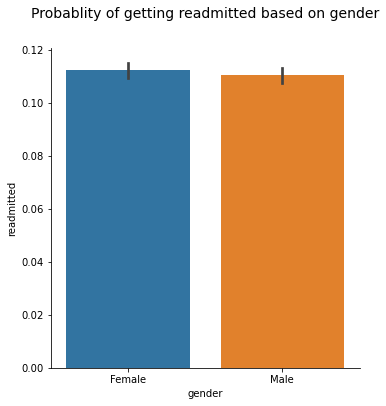

In [37]:
plt.figure(figsize=(8,4))
plot = sns.catplot(x = 'gender', 
            y = 'readmitted',
            kind = 'bar', 
            data = diabetes_df)
plot.set_xlabels()

plt.title("Probablity of getting readmitted based on gender", pad = 30, fontsize = 14)
plt.show()

 #### Female have slighlty high probablity to get readmitted than male, but the difference is almost negligible.We can consider it as an insignificant feature. 

## 

#### Age

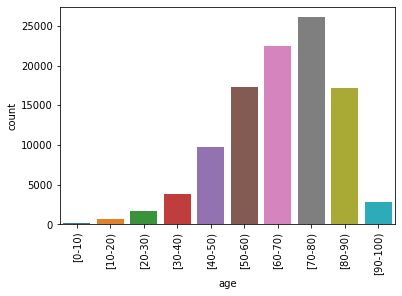

          %age belonging to class 1
[20-30)                   14.242607
[80-90)                   12.083503
[70-80)                   11.773958
[30-40)                   11.231788
[60-70)                   11.128903
[90-100)                  11.099177
[40-50)                   10.604027
[50-60)                    9.666203
[10-20)                    5.788712
[0-10)                     1.863354


In [38]:
sns.countplot(x="age", data = diabetes_df)
plt.xticks(rotation = 90)
plt.show()

diabetes_df['age']

print(category_ratio('age'))

#### Age being a categorical variable doesn't provide much significance to the analysis, so, we need to get rid of this and convert it to a numerical variable. As we can see that age is povided as a range and we can't convert it to a numeric variable till is doesn't represent a single number. To solve this problem, we decide to go statically and find the mean of the range, where we just have two number provided.  [ (a +b)/2 ]

In [39]:
diabetes_df['age'] = diabetes_df['age'].replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

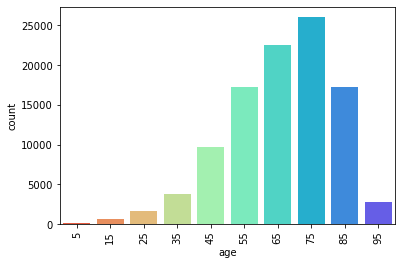

    %age belonging to class 1
25                  14.242607
85                  12.083503
75                  11.773958
35                  11.231788
65                  11.128903
95                  11.099177
45                  10.604027
55                   9.666203
15                   5.788712
5                    1.863354


In [40]:
sns.countplot(x="age", data = diabetes_df, palette='rainbow_r')
plt.xticks(rotation = 90)

plt.show()
print(category_ratio('age'))

### Age - Readmitted 

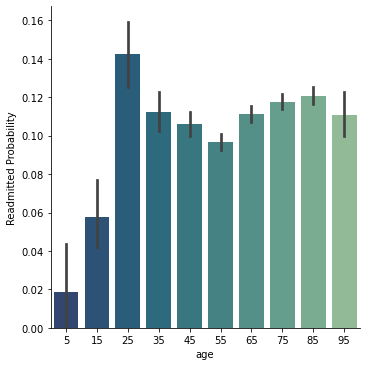

In [41]:
plot1 = sns.catplot(x = "age", y = "readmitted", data = diabetes_df, 
                   kind = "bar", height = 5, palette='crest_r')
plot1.set_ylabels("Readmitted Probability")
plt.show()

#### After visualising the age  -  readmitted, we can we that, people are less prone to diabetese in the youth or early age. we can find high probablity of getting readmitted in people of age around 25. But mostly we can see high probablity in the elderly age group.

### 

Admission Type ID
Integer identifier corresponding to 9 distinct values;

Emergency : 1
Urgent : 2
Elective : 3
Newborn : 4
Not Available : 5
NULL : 6
Trauma Center : 7
Not Mapped : 8

In [42]:
diabetes_df['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7], dtype=int64)

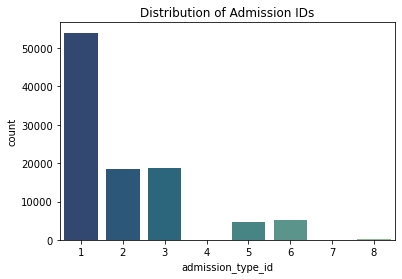

Distribution of ID's
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


In [43]:
sns.countplot(x = "admission_type_id", data = diabetes_df, palette='crest_r')
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(diabetes_df.admission_type_id.value_counts())

#### As we know that there are eight different categories, in which 'Emergency and Urgent' have same meaning so we will convert it 

##### to one category. For 'Not availabe, NULL and Not mapped', we will convert it to nan/NULL for better understanding.

# 

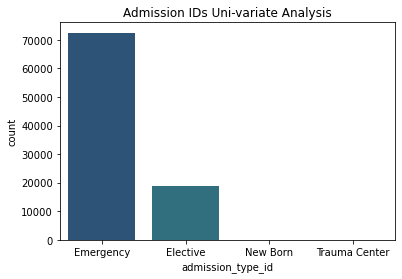

admission_type_id - 

Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


In [44]:
catList_admission_type_id = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

diabetes_df['admission_type_id'] = diabetes_df['admission_type_id'].replace(catList_admission_type_id)

sns.countplot(x = "admission_type_id", data = diabetes_df, palette='crest_r')
plt.title("Admission IDs Uni-variate Analysis")
plt.show()

print("admission_type_id - ")
print()
print(diabetes_df['admission_type_id'].value_counts())

### 

### Admission_type_id - Readmitted

<Figure size 576x288 with 0 Axes>

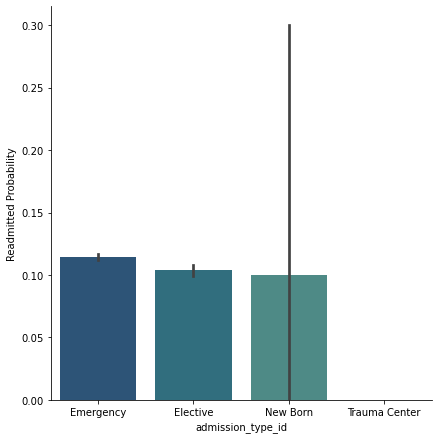

In [45]:
plt.figure(figsize=(8,4))

plot2 = sns.catplot(x = "admission_type_id", y ="readmitted",
                    data = diabetes_df, height = 6, kind = "bar", palette='crest_r')
plot2.set_ylabels("Readmitted Probability")
plt.show()

In [46]:
diabetes_df[diabetes_df['admission_type_id'] == 'Trauma Center']['readmitted'].unique()

array([0], dtype=int64)

#### Patients having admission_type_id as Turama Center have not been readmitted once they are discharged.

#### We can say that readmittion probablity of Emergency, Ellective and New born is high and there may be hight error in the readmittion probablity of New born

## 

### Discharge_disposition_id

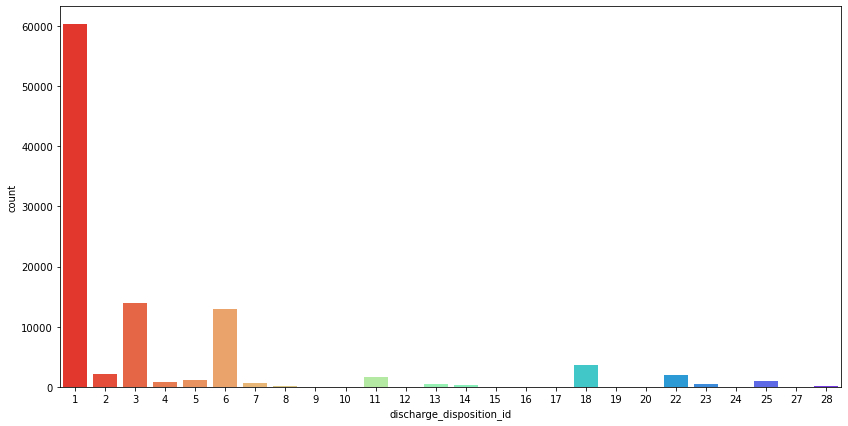

In [47]:
plt.figure(figsize=(14,7))

sns.countplot(x ="discharge_disposition_id", data = diabetes_df, palette='rainbow_r')
plt.show()

#### Discharge_disposition_id discription - 
  
    1. Discharged to home
    2. Discharged/transferred to another short term hospital
    3. Discharged/transferred to SNF
    4. Discharged/transferred to ICF
    5. Discharged/transferred to another type of inpatient care institution
    6. Discharged/transferred to home with home health service
    7. Left AMA
    8. Discharged/transferred to home under care of Home IV provider
    9. Admitted as an inpatient to this hospital
    10. Neonate discharged to another hospital for neonatal aftercare
    11. Expired
    12. Still patient or expected to return for outpatient services
    13. Hospice / home
    14. Hospice / medical facility
    15. Discharged/transferred within this institution to Medicare approved swing bed
    16. Discharged/transferred/referred another institution for outpatient services
    17. Discharged/transferred/referred to this institution for outpatient services
    18. NULL
    19. Expired at home. Medicaid only, hospice.
    20. Expired in a medical facility. Medicaid only, hospice.
    21. Expired, place unknown. Medicaid only, hospice.
    22. Discharged/transferred to another rehab fac including rehab units of a hospital .
    23. Discharged/transferred to a long term care hospital.
    24. Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
    25. Not Mapped
    26. Unknown/Invalid
    27. Discharged/transferred to a Critical Access Hospital (CAH).
    28. Discharged/transferred to a federal health care facility.
    29. Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
    30. Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

* There are 29 differnt discription ID type. To make it little bit easier and cleaner to visualise we have classified three different categories i.e, <b>[Home, Discharged/Transfer, Other],</b> based on assumption where every the person have given home as desposition ID we have put them in home category , dischared/transferes have one seperate category and rest of the types are put into Others category. 

In [48]:
mapping_dictonary_dd = { 
                        1 : 'Home', 8 : 'Home', 13 : 'Home', 19 : 'Home',
                        18 : np.nan, 25 : np.nan, 26 : np.nan,
                        2 : 'Discharged/Transfer', 3 : 'Discharged/Transfer', 4 : 'Discharged/Transfer',
                        5 : 'Discharged/Transfer', 6 : 'Discharged/Transfer', 22 : 'Discharged/Transfer',
                        23 : 'Discharged/Transfer', 24 : 'Discharged/Transfer', 27 : 'Discharged/Transfer',
                        28 : 'Discharged/Transfer', 29 : 'Discharged/Transfer', 30 : 'Discharged/Transfer',
                        7 : 'Other', 9 : 'Other', 10 : 'Other', 11 : 'Other', 12 : 'Other', 14 : 'Other',
                        15 : 'Other', 16 : 'Other', 17 : 'Other', 20 : 'Other', 21 : 'Other'
                    
                    }

In [49]:
diabetes_df["discharge_disposition_id"] = diabetes_df["discharge_disposition_id"].replace(mapping_dictonary_dd)

In [50]:
diabetes_df['discharge_disposition_id'].unique()

array([nan, 'Home', 'Discharged/Transfer', 'Other'], dtype=object)

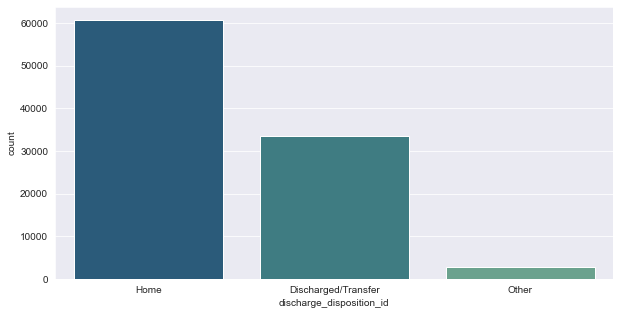

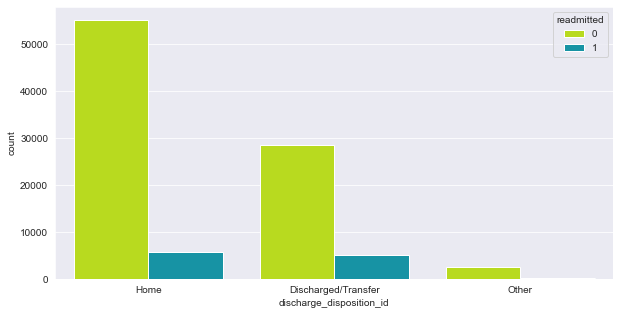

Proportions of ID's
Home                   62.572232
Discharged/Transfer    34.587930
Other                   2.839838
Name: discharge_disposition_id, dtype: float64


In [51]:
plt.figure(figsize=(10,5))

sns.set_style('darkgrid')
sns.countplot(x ="discharge_disposition_id", data = diabetes_df, palette='crest_r')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = diabetes_df, palette='nipy_spectral_r')
plt.show()

print("Proportions of ID's")
print(diabetes_df.discharge_disposition_id.value_counts(normalize=True)*100)

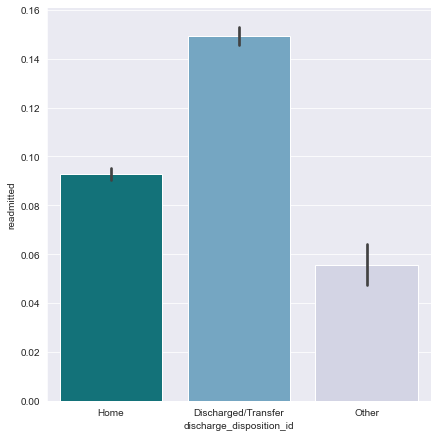

In [52]:
sns.set_style('darkgrid')
sns.color_palette()
g = sns.catplot(x='discharge_disposition_id', 
            y = 'readmitted', data = diabetes_df, 
            kind = 'bar', height=6, palette='PuBuGn_r')

plt.show()

#### Readmittion probablity of discharged/transfered patient is very high, followed by home and then others.

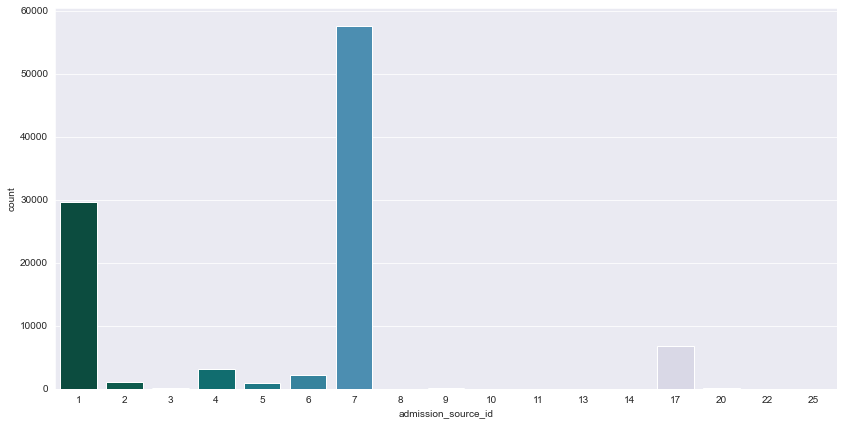

In [53]:
plt.figure(figsize=(14,7))
sns.countplot(x ="admission_source_id", data = diabetes_df, palette='PuBuGn_r')
plt.show()

### Admission_source_id discription    
    
    1. Physician Referral
    2. Clinic Referral
    3. HMO Referral
    4. Transfer from a hospital
    5. Transfer from a Skilled Nursing Facility (SNF)
    6.Transfer from another health care facility
    7. Emergency Room
    8. Court/Law Enforcement
    9.Not Available
    10. Transfer from critial access hospital
    11. Normal Delivery
    12. Premature Delivery
    13. Sick Baby
    14. Extramural Birth
    15. Not Available
    17. NULL
    18. Transfer From Another Home Health Agency
    19. Readmission to Same Home Health Agency
    20. Not Mapped
    21. Unknown/Invalid
    22. Transfer from hospital inpt/same fac reslt in a sep claim
    23. Born inside this hospital
    24. Born outside this hospital
    25. Transfer from Ambulatory Surgery Center
    26. Transfer from Hospice

* null = ['not available', 'null', 'Not Mapped', 'Unknown/Invalid']
* Emergency = ['Emergency Room']
* referral/transfer = ['... referral', 'transfer...']

In [54]:
mapping_dictonary_as = {
    
    1:"Referral/transfer",2:"Referral/transfer",3:"Referral/transfer",
    4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
    9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
    15:np.nan,17:np.nan,20:np.nan,21:np.nan,
    7:"Emergency"
}


In [55]:
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(mapping_dictonary_as)

In [56]:
diabetes_df['admission_source_id'].unique()

array(['Referral/transfer', 'Emergency', 'Other', nan], dtype=object)

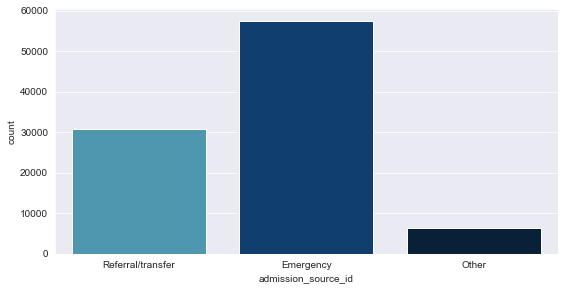

Emergency            60.632138
Referral/transfer    32.540260
Other                 6.827601
Name: admission_source_id, dtype: float64


In [57]:
plt.figure(figsize=(9,4.5))
sns.countplot(x ="admission_source_id", data = diabetes_df, palette='ocean_r')
plt.show()

print(diabetes_df['admission_source_id'].value_counts(normalize=True)*100)

### admission_source_id - readmitted

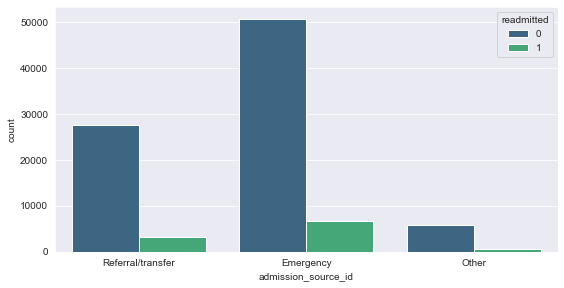

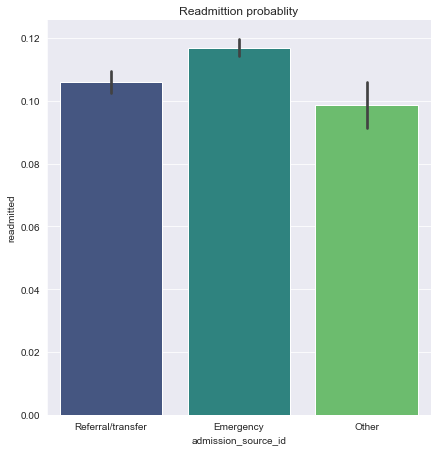

In [58]:
plt.figure(figsize=(9,4.5))
sns.countplot(x ="admission_source_id", data = diabetes_df, hue = 'readmitted', palette='viridis')
plt.show()

print()

sns.catplot(x = 'admission_source_id', 
            y = 'readmitted', 
            data = diabetes_df, 
            kind = 'bar', height=6, palette='viridis')
plt.title('Readmittion probablity')

plt.show()

#### We can say, Patients from emergencies are highly prone to be readmitted, followed by Referral/transfer and the others. 

## 

###  Time_in_hospital

Integer number of days between admission and discharge                  

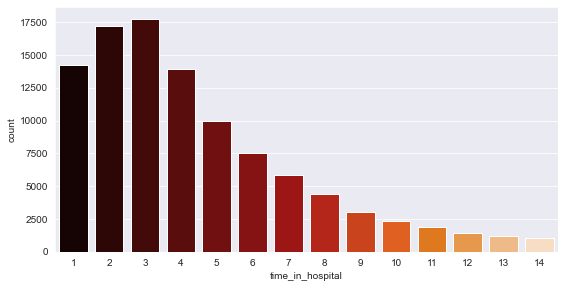

    %age belonging to class 1
10                  14.346712
8                   14.236902
9                   13.724184
12                  13.328729
14                  12.955854
7                   12.834955
6                   12.587876
13                  12.314050
5                   12.030905
4                   11.806952
3                   10.666817
11                  10.512129
2                    9.939619
1                    8.179642


In [59]:
plt.figure(figsize=(9,4.5))
sns.countplot(x ="time_in_hospital", data = diabetes_df, palette='gist_heat')
plt.show()

print(category_ratio('time_in_hospital'))

## 


### Time_in_hospital - readmitted

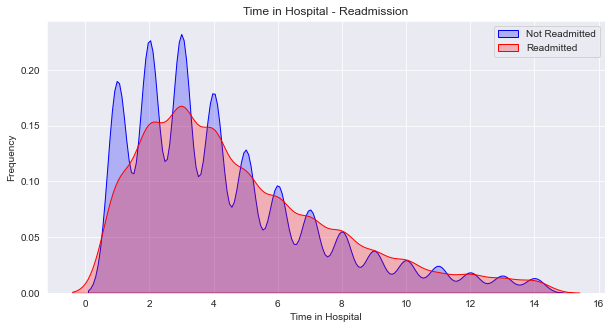

In [60]:
plt.figure(figsize=(10,5))

#not_readmitted = 0
#readmitted = 1

plot = sns.kdeplot(diabetes_df.loc[(diabetes_df.readmitted == 0), "time_in_hospital"],
                 color = "blue", shade = True, label = "Not Readmitted")

plot = sns.kdeplot(diabetes_df.loc[(diabetes_df.readmitted == 1), "time_in_hospital"],
                 color = "red", shade = True, label = "Readmitted")
plot.legend(loc="upper right")

plot.set_xlabel("Time in Hospital")
plot.set_ylabel("Frequency")
plot.set_title("Time in Hospital - Readmission")
plt.show()

We can say that most of the patient have mostly stayed for 2 to 3 days.

In [61]:
print(category_ratio('time_in_hospital'))
print(val_counts(diabetes_df,'time_in_hospital'))

    %age belonging to class 1
10                  14.346712
8                   14.236902
9                   13.724184
12                  13.328729
14                  12.955854
7                   12.834955
6                   12.587876
13                  12.314050
5                   12.030905
4                   11.806952
3                   10.666817
11                  10.512129
2                    9.939619
1                    8.179642
    Total observations  %age of total data
3                17756           17.448385
2                17224           16.925602
1                14206           13.959887
4                13924           13.682773
5                 9966            9.793343
6                 7539            7.408390
7                 5859            5.757495
8                 4390            4.313945
9                 3002            2.949992
10                2342            2.301426
11                1855            1.822863
12                1448            

If we look at top 5 categories of days which has highest chance of readmittance, we see 10,8,9,12 & 14 which is quite intuitive because more time spent in hospital means more severe was the condition. If we look at the bottom 5 categories of days which has lowest chance of readmittance, we see 4,3,11,2 & 1 which is also explanable. But these IDs have majority of the observations

## 

##### payer_code

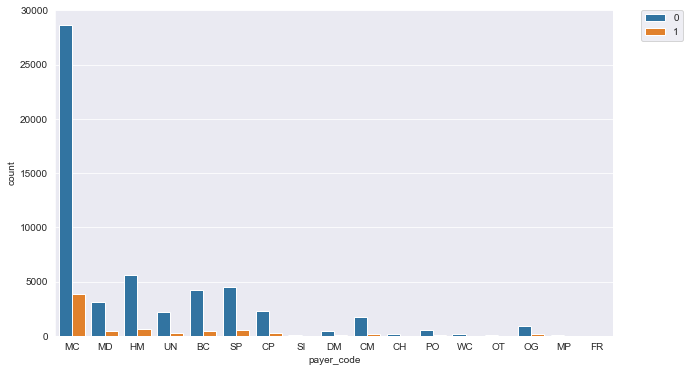

MC    52.739481
HM    10.200299
SP     8.140405
BC     7.568121
MD     5.742342
CP     4.114912
UN     3.979970
CM     3.149184
OG     1.679456
PO     0.962476
DM     0.892567
CH     0.237367
WC     0.219484
OT     0.154451
MP     0.128439
SI     0.089419
FR     0.001626
Name: payer_code, dtype: float64


In [62]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="payer_code", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print(diabetes_df.payer_code.value_counts(normalize = True)*100)


#### Majority of observations are null in payer_code. MC has Highest entries after null. 

### 

### medical_specialty

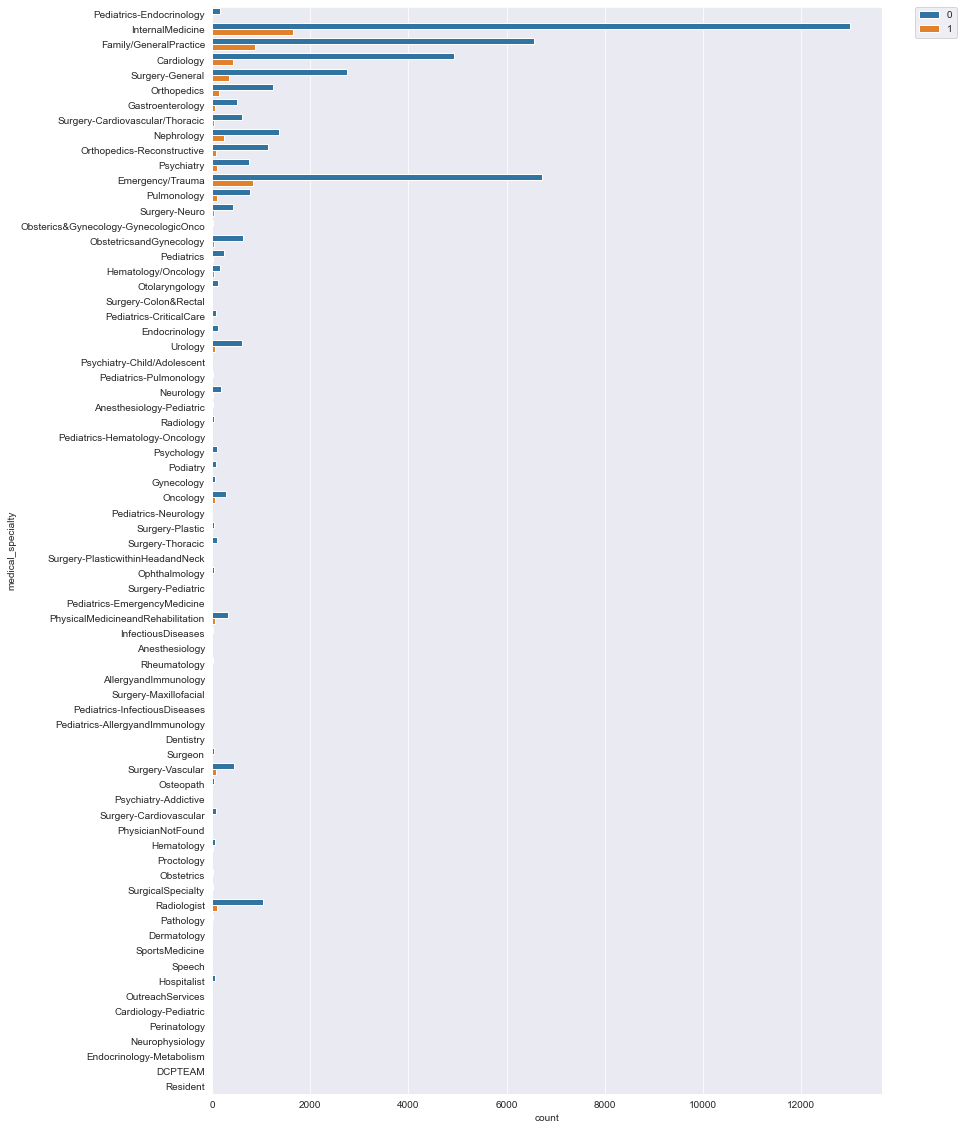

MC    52.739481
HM    10.200299
SP     8.140405
BC     7.568121
MD     5.742342
CP     4.114912
UN     3.979970
CM     3.149184
OG     1.679456
PO     0.962476
DM     0.892567
CH     0.237367
WC     0.219484
OT     0.154451
MP     0.128439
SI     0.089419
FR     0.001626
Name: payer_code, dtype: float64


In [63]:
plt.figure(figsize=(12,20))
sns.countplot(y="medical_specialty", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print(diabetes_df.payer_code.value_counts(normalize = True)*100)

* As we can see majority of the observations have missing value for medical_specialty.
* Apart from that, InternalMedicine has the majority of the observations.
* Resident class has the highest chance of readmittance (50%) followed by Hematology.
* But most of the classes have very very few observations.

#### 

### number_diagnoses

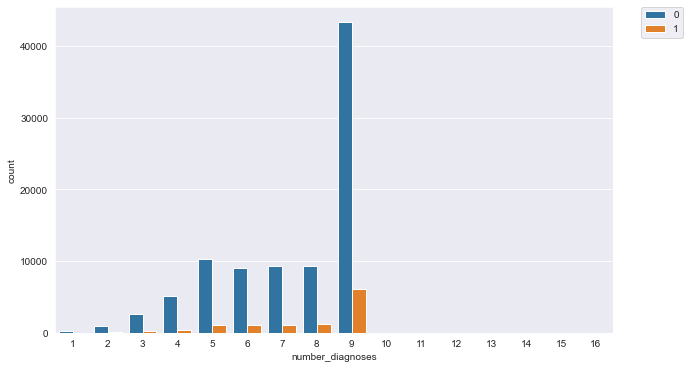

    %age belonging to class 1
11                  27.272727
15                  20.000000
13                  18.750000
10                  17.647059
14                  14.285714
9                   12.380490
8                   11.812359
12                  11.111111
7                   10.766862
6                   10.412361
5                    9.155548
16                   8.888889
4                    8.255058
3                    7.372134
2                    6.060606
1                    5.936073
    Total observations  %age of total data
9                49473           48.615902
5                11392           11.194639
8                10616           10.432082
7                10393           10.212946
6                10161            9.984965
4                 5536            5.440091
3                 2835            2.785885
2                 1023            1.005277
1                  219            0.215206
16                  45            0.044220
10               

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x="number_diagnoses", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('number_diagnoses'))
print(val_counts(diabetes_df,'number_diagnoses'))

####  

* Majority of the patients have gone through total 9 diagnosis .
* The chances of readmittance seems slightly more if you go for more number of diagnosis.

# 

### max_glu_serum

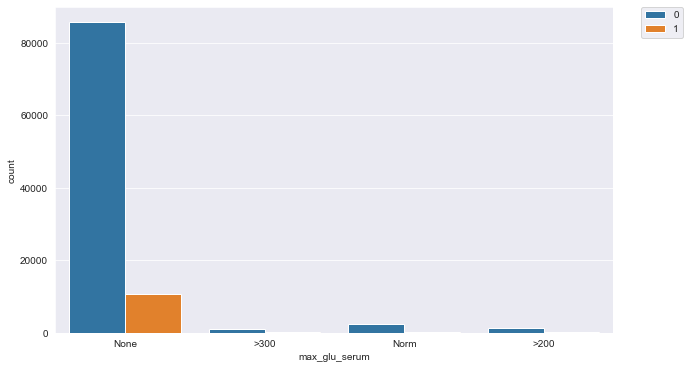

      %age belonging to class 1
>300                  14.319620
>200                  12.457912
Norm                  11.359261
None                  11.093479
      Total observations  %age of total data
None               96417           94.746617
Norm                2597            2.552008
>200                1485            1.459273
>300                1264            1.242102


In [65]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="max_glu_serum", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('max_glu_serum'))
print(val_counts(diabetes_df,'max_glu_serum'))

* If the 'max_glu_serum' test result is >300, then the chance of readmittance is highest followed by >200.
* But the difference between chance od readmittance to the case where your glucose level is Normal to that where it is >300 is * not that significant (it is just around 3%).
* Majority of the patients have not gone through this test.

# 

### A1Cresult

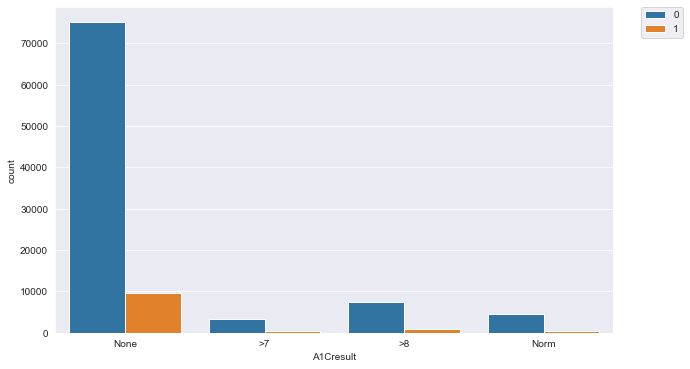

      %age belonging to class 1
None                  11.423683
>7                    10.047219
>8                     9.870983
Norm                   9.659319
      Total observations  %age of total data
None               84745           83.276829
>8                  8216            8.073661
Norm                4990            4.903550
>7                  3812            3.745959


In [66]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="A1Cresult", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('A1Cresult'))
print(val_counts(diabetes_df,'A1Cresult'))

* Chances of readmittance seems slightly more if patient does not under go this test.
* But the difference between chances of readmittance in all the 4 cases is not that significant.
* Majority of the patients have not gone through this test.

### change

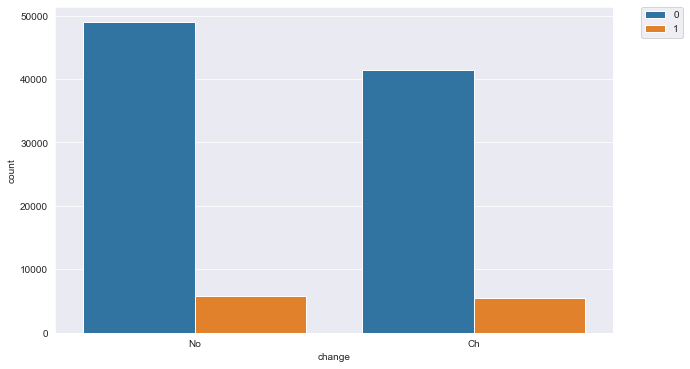

    %age belonging to class 1
Ch                  11.823268
No                  10.591007
    Total observations  %age of total data
No               54754           53.805411
Ch               47009           46.194589


In [67]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="change", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('change'))
print(val_counts(diabetes_df,'change'))

#### If one goes medication change then chance of readmission is just slighlty more else this seems perfectly balanced feature almost balanced patient in both categories

## 

### num_lab_procedures

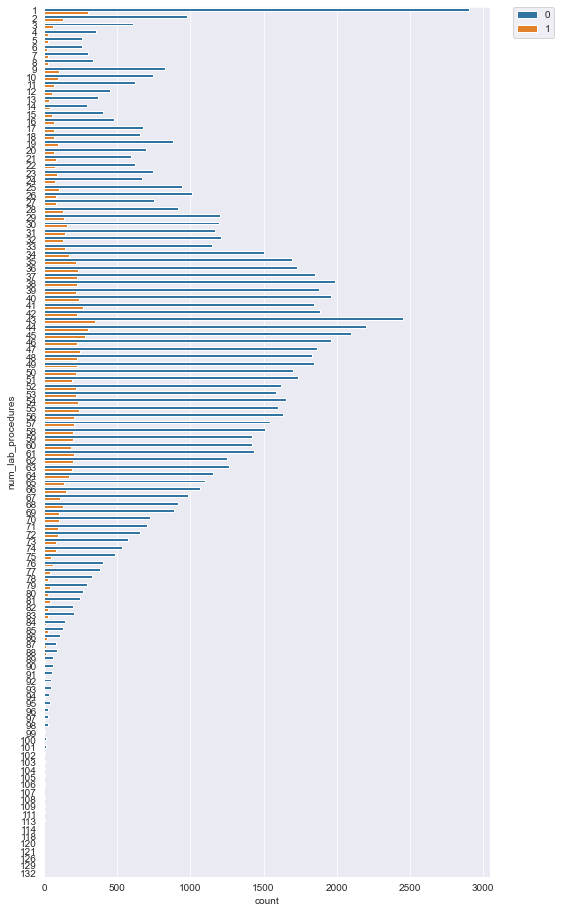

     %age belonging to class 1
132                 100.000000
105                  33.333333
109                  25.000000
108                  25.000000
106                  20.000000
..                         ...
129                   0.000000
102                   0.000000
113                   0.000000
114                   0.000000
118                   0.000000

[118 rows x 1 columns]
     Total observations  %age of total data
1                  3208            3.152423
43                 2804            2.755422
44                 2496            2.452758
45                 2376            2.334837
38                 2212            2.173678
..                  ...                 ...
120                   1            0.000983
132                   1            0.000983
121                   1            0.000983
126                   1            0.000983
118                   1            0.000983

[118 rows x 2 columns]


In [68]:
fig = plt.figure(figsize=(8,16))
sns.countplot(y="num_lab_procedures", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('num_lab_procedures'))
print(val_counts(diabetes_df,'num_lab_procedures'))

<AxesSubplot:xlabel='readmitted', ylabel='num_lab_procedures'>

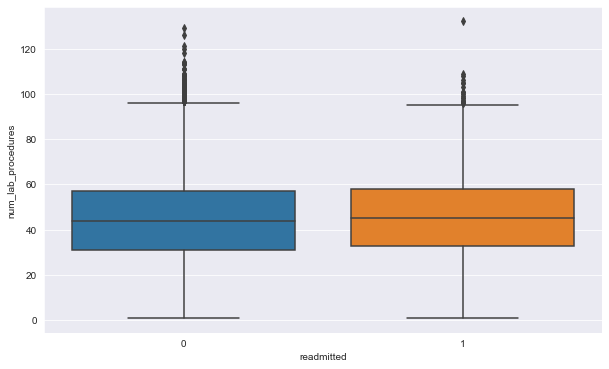

In [69]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y = 'num_lab_procedures',data=diabetes_df)

* In case of no readmittion there are more outliers.
* Box plot is also considing so we can state anything from this feature

### 

##### num_procedures

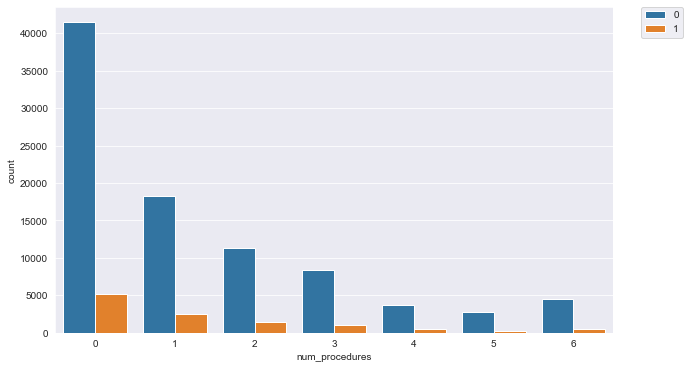

   %age belonging to class 1
1                  12.207705
2                  11.182762
0                  11.077767
4                  11.028708
3                  10.685164
6                   9.588212
5                   9.424764
   Total observations  %age of total data
0               46652           45.843774
1               20741           20.381671
2               12716           12.495701
3                9443            9.279404
6                4954            4.868174
4                4180            4.107583
5                3077            3.023692


In [70]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="num_procedures", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('num_procedures'))
print(val_counts(diabetes_df,'num_procedures'))

<AxesSubplot:ylabel='num_procedures'>

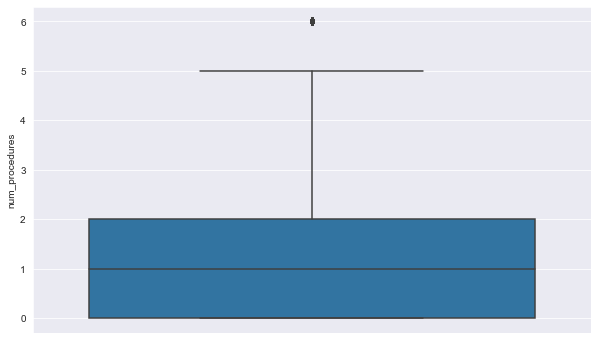

In [71]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(y = 'num_procedures',data=diabetes_df)

* Very few people have opted for all the test and readmittion probablity is also very high were patients have opted for lesser tests.

*  Very few outliers are present in the case of num_procedure. We can handle those outliers easily using some transformation techniques.

#### 

### num_medications

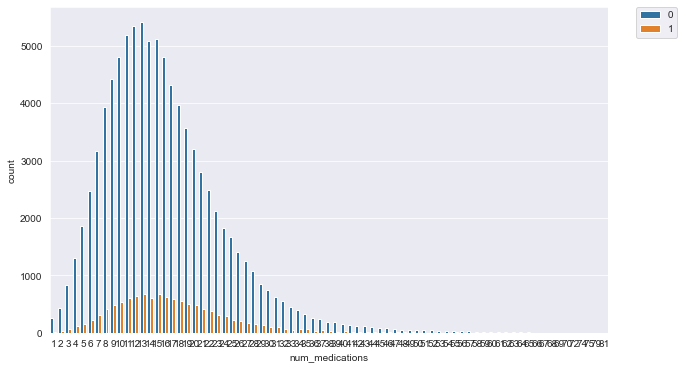

    %age belonging to class 1
81                 100.000000
72                 100.000000
70                  50.000000
68                  28.571429
67                  28.571429
..                        ...
66                   0.000000
69                   0.000000
79                   0.000000
75                   0.000000
74                   0.000000

[75 rows x 1 columns]
    Total observations  %age of total data
13                6086            5.980563
12                6004            5.899983
11                5795            5.694604
15                5792            5.691656
14                5707            5.608129
..                 ...                 ...
70                   2            0.001965
75                   2            0.001965
81                   1            0.000983
79                   1            0.000983
74                   1            0.000983

[75 rows x 2 columns]


In [72]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="num_medications", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('num_medications'))
print(val_counts(diabetes_df,'num_medications'))

<AxesSubplot:xlabel='readmitted', ylabel='num_medications'>

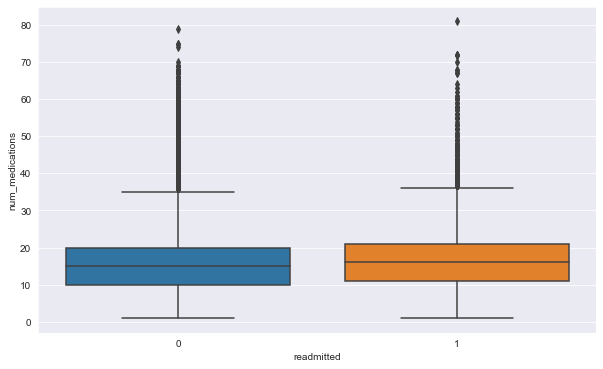

In [73]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(y = 'num_medications', x= 'readmitted', data=diabetes_df)

* num_medications' seems right skewed and so does the chance of getting readmission.
* There are alot of outliers present in this feature and box plot is also considing. There is no segnificant Information.

#### 

### number_outpatient

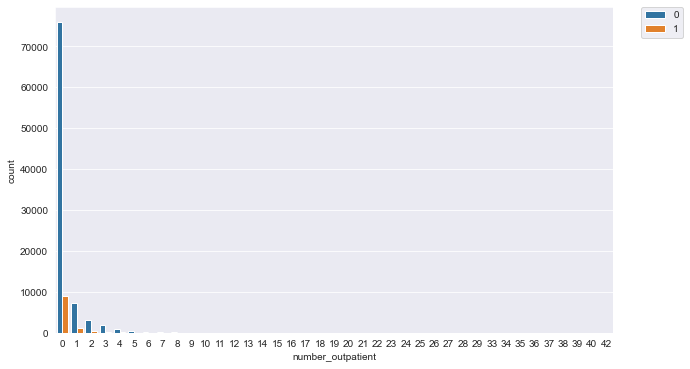

    %age belonging to class 1
40                 100.000000
23                  50.000000
19                  33.333333
22                  20.000000
12                  20.000000
13                  19.354839
14                  17.857143
9                   15.662651
7                   15.483871
4                   15.104641
11                  14.285714
1                   13.923014
2                   13.745131
6                   13.201320
17                  12.500000
3                   12.291871
5                   11.819887
0                   10.674633
15                  10.000000
10                   8.771930
8                    5.102041
21                   0.000000
34                   0.000000
38                   0.000000
37                   0.000000
28                   0.000000
25                   0.000000
33                   0.000000
26                   0.000000
42                   0.000000
39                   0.000000
16                   0.000000
24        

In [74]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="number_outpatient", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('number_outpatient'))
print(val_counts(diabetes_df,'number_outpatient'))

<AxesSubplot:xlabel='readmitted', ylabel='number_outpatient'>

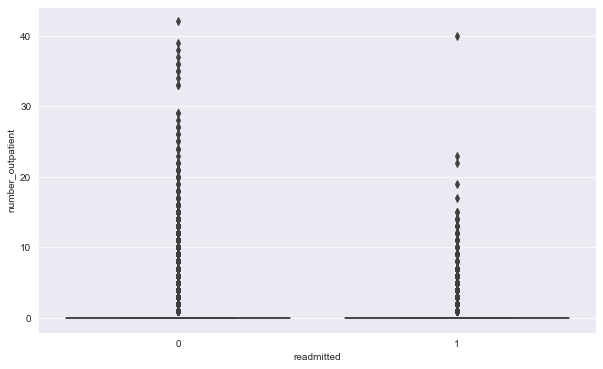

In [75]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y = 'number_outpatient',data=diabetes_df)

* As the number of out patient increasing, readmittion probablity is also getting low.
* Feature has alot of outliers and box plot are considing. No significant information.

### 

### number_emergency

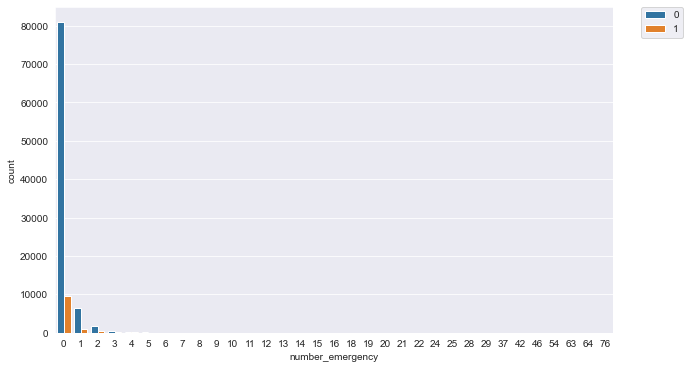

    %age belonging to class 1
64                 100.000000
28                 100.000000
20                  50.000000
22                  50.000000
21                  50.000000
19                  50.000000
16                  40.000000
9                   36.363636
10                  35.294118
15                  33.333333
13                  33.333333
8                   32.000000
4                   30.748663
7                   26.027397
5                   24.479167
6                   23.404255
11                  21.739130
3                   20.275862
18                  20.000000
12                  20.000000
2                   18.266405
1                   14.354566
0                   10.474663
14                   0.000000
42                   0.000000
46                   0.000000
76                   0.000000
37                   0.000000
25                   0.000000
63                   0.000000
54                   0.000000
24                   0.000000
29        

In [76]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="number_emergency", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('number_emergency'))
print(val_counts(diabetes_df,'number_emergency'))

<AxesSubplot:xlabel='readmitted', ylabel='number_emergency'>

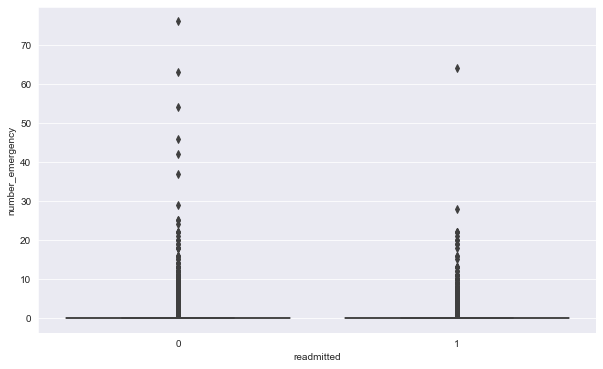

In [77]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y = 'number_emergency',data=diabetes_df)

* Most of the patients have no emergency visit or very low emergency visit befor admittion.
* Mazority of data points are outliers.

#### 

### number_inpatient

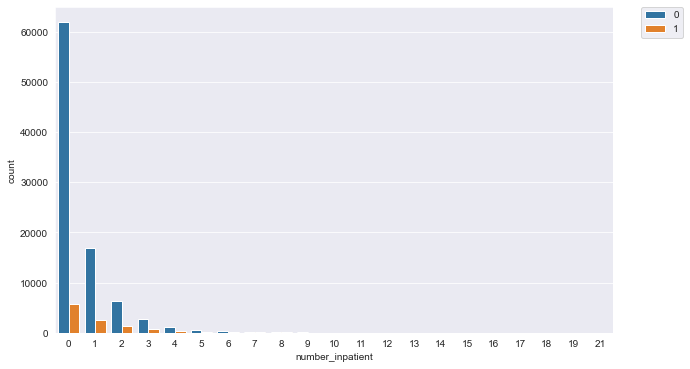

    %age belonging to class 1
15                 100.000000
21                 100.000000
17                 100.000000
11                  67.346939
13                  50.000000
12                  50.000000
19                  50.000000
8                   44.370861
10                  42.622951
9                   42.342342
14                  40.000000
7                   35.447761
6                   34.583333
16                  33.333333
5                   31.403941
4                   23.612824
3                   20.287306
2                   17.433254
1                   12.924543
0                    8.437458
18                   0.000000
    Total observations  %age of total data
0                67627           66.455391
1                19521           19.182807
2                 7566            7.434922
3                 3411            3.351906
4                 1622            1.593900
5                  812            0.797932
6                  480            0.471

In [78]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="number_inpatient", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('number_inpatient'))
print(val_counts(diabetes_df,'number_inpatient'))

<AxesSubplot:xlabel='readmitted', ylabel='number_inpatient'>

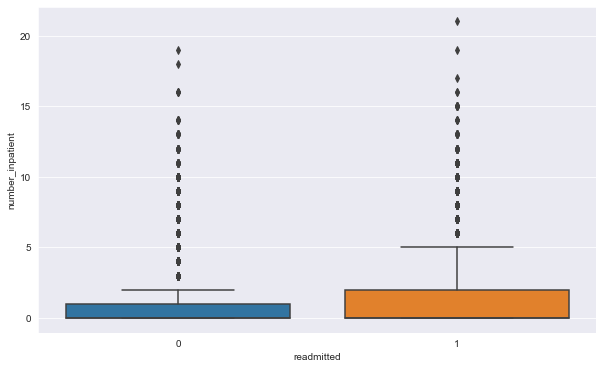

In [79]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y = 'number_inpatient',data=diabetes_df)

* Hight impatient values have higher probablity of getting readmitted. As the Impatient value reduces readmittion probablilty also decreases.
* There are outliers present in the feature with are intended to be treated using transformation techniques in further preprocessing steps.

* There were alot of id's in "diag_1","diag_2","diag_3". It would be imposible to draw any insight. After some background research of domain we found ICD-9 data, which could explain all the Id's. So we mapped all the ID's to ICD-9 categories.

In [80]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [81]:
diabetes_df = map_diagnosis(diabetes_df,["diag_1","diag_2","diag_3"])

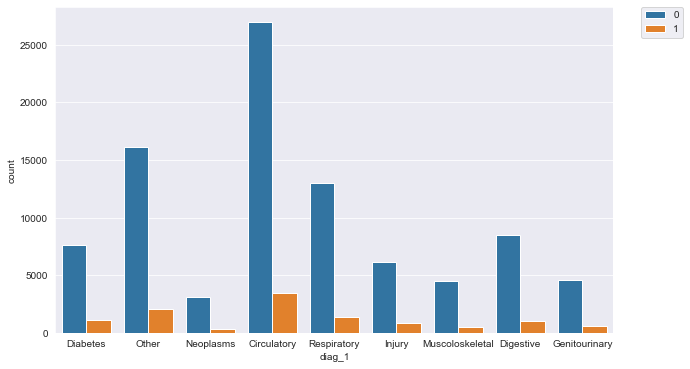

                 %age belonging to class 1
Diabetes                         12.983899
Injury                           12.248996
Other                            11.493432
Circulatory                      11.450256
Genitourinary                    10.846199
Digestive                        10.712401
Neoplasms                        10.078648
Respiratory                       9.727519
Muscoloskeletal                   9.501715
                 Total observations  %age of total data
Circulatory                   30436           29.908709
Other                         18193           17.877814
Respiratory                   14423           14.173128
Digestive                      9475            9.310850
Diabetes                       8757            8.605289
Injury                         6972            6.851213
Genitourinary                  5117            5.028350
Muscoloskeletal                4957            4.871122
Neoplasms                      3433            3.373525


In [82]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="diag_1", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('diag_1'))
print(val_counts(diabetes_df,'diag_1'))

* Diag_1-  Diabetes patients are more prone to be getting admitted follow by Injury and Other patients.

### 

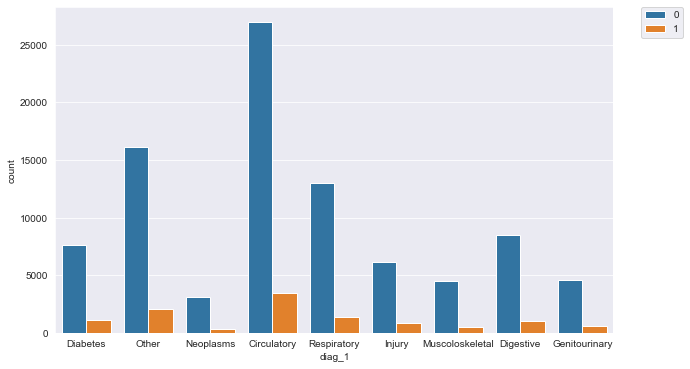

                 %age belonging to class 1
Neoplasms                        14.919513
Genitourinary                    11.759790
Digestive                        11.486811
Injury                           11.459192
Other                            11.218461
Circulatory                      11.101004
Diabetes                         10.583086
Respiratory                      10.518587
Muscoloskeletal                  10.034014
                 Total observations  %age of total data
Circulatory                   31880           31.327693
Other                         26911           26.444779
Diabetes                      12794           12.572349
Respiratory                   10895           10.706249
Genitourinary                  8376            8.230889
Digestive                      4170            4.097757
Neoplasms                      2547            2.502874
Injury                         2426            2.383971
Muscoloskeletal                1764            1.733439


In [83]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="diag_1", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('diag_2'))
print(val_counts(diabetes_df,'diag_2'))

* Diag_2 -  Neoplams patients are more prone to be getting admitted follow by Genitourinary and Digestive system patients.

## 

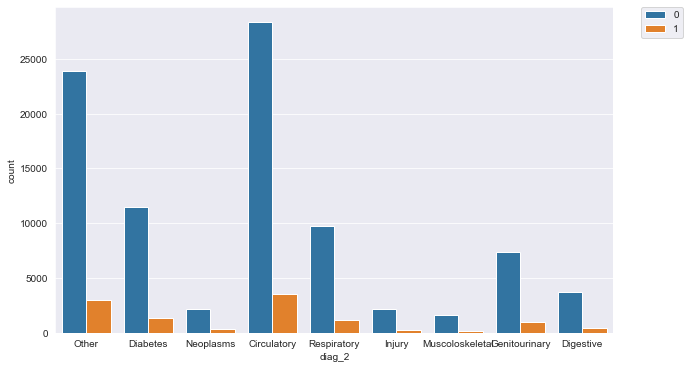

                 %age belonging to class 1
Neoplasms                        14.224138
Genitourinary                    13.458084
Respiratory                      12.054906
Digestive                        11.959288
Injury                           11.568123
Other                            10.843649
Circulatory                      10.806798
Muscoloskeletal                  10.652742
Diabetes                         10.567115
                 Total observations  %age of total data
Other                         30617           30.086574
Circulatory                   30305           29.779979
Diabetes                      17157           16.859762
Respiratory                    7358            7.230526
Genitourinary                  6680            6.564272
Digestive                      3930            3.861914
Injury                         1945            1.911304
Muscoloskeletal                1915            1.881823
Neoplasms                      1856            1.823846


In [84]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="diag_2", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('diag_3'))
print(val_counts(diabetes_df,'diag_3'))

* Diag_3 -  Neoplams patients are more prone to be getting admitted follow by Genitourinary and Respiratory system patients.

### 

In [85]:
def Split_plot(features,df):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize = (15,15) )
    index = 0
    for i in range(3):
        for j in range(3):
            sns.countplot(x=features[index], hue="readmitted", data=df, ax=axs[i,j],palette="ocean_r" )
            index += 1
l1 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
      'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide']
l2 = ['miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone']
l3 = ['metformin-rosiglitazone','metformin-pioglitazone' , 'pioglitazone', 'rosiglitazone', 'acarbose']

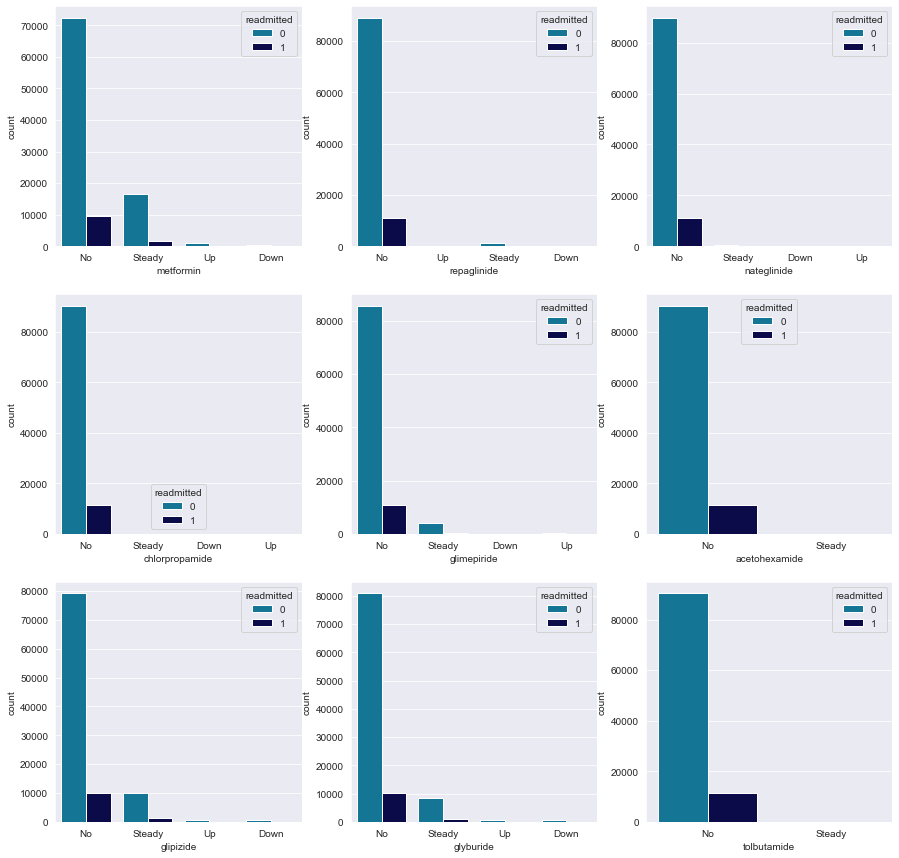

In [86]:
Split_plot(l1, diabetes_df)

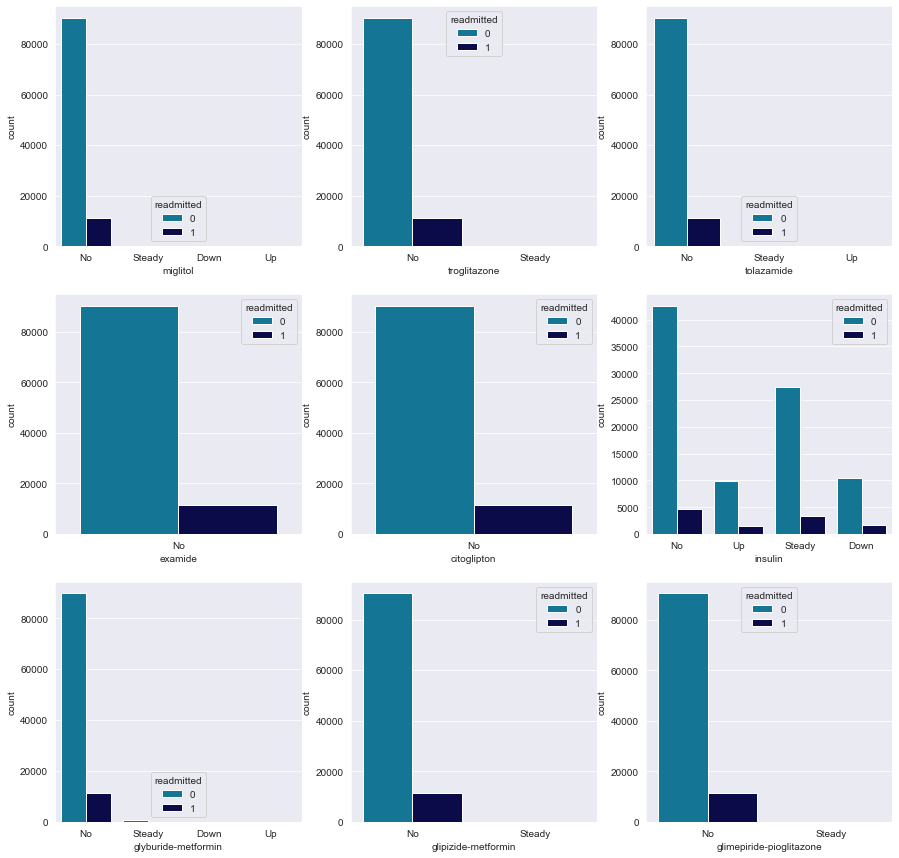

In [87]:
Split_plot(l2, diabetes_df)

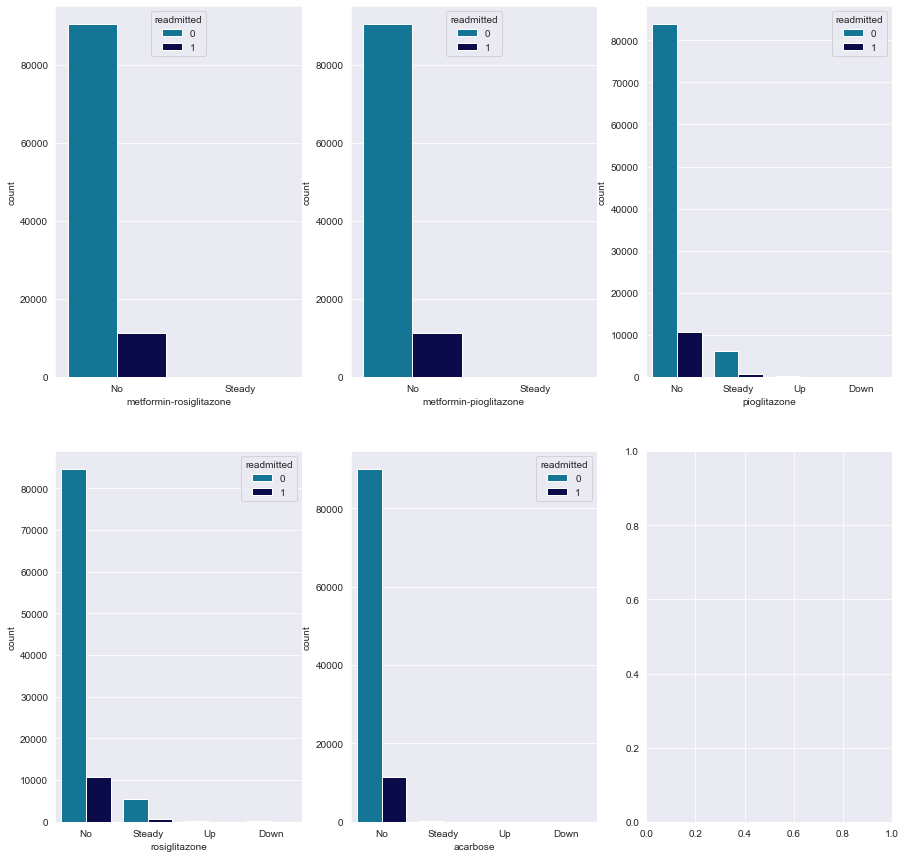

In [88]:
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize = (15,15) )
index = 0

for i in range(2):
    for j in range(3):
        try:
            sns.countplot(x=l3[index], hue="readmitted", data=diabetes_df, ax=axs[i,j],palette="ocean_r")
            index += 1
        except IndexError:
            print('')

* metformin-pioglitazone, metformin-rosiglitazone, glimepiride-pioglitazone, glipizide-metformin, examide, citoglipton, acetohexamide, tolbutamide were never prescribed to a patient.
* Readmittion probablity is very high where patient have not been prescribed with medicine.
* Then the second most frequent status of medicine is 'Steady'.

In [89]:
def plot_med_stat(status):
    l = l1 + l2 + l3
    
    dic = {}
    explode = []
    for med in l:
        if len(diabetes_df[diabetes_df[med]==status]) > 100:
            dic[med] = len(diabetes_df[diabetes_df[med]==status])
            explode.append(0.2)
    print(pd.DataFrame.from_dict(dic,orient='index',columns=['total']).sort_values(by=['total']))

    plt.figure(figsize =(10,10))
    plt.pie(dic.values(),labels=dic.keys(),explode = explode, shadow=True, rotatelabels=True,autopct='%1.1f%%')
    plt.legend(title="Medicine names",loc="best",bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

               total
repaglinide      110
rosiglitazone    178
pioglitazone     234
glimepiride      327
glipizide        770
glyburide        812
metformin       1067
insulin        11316


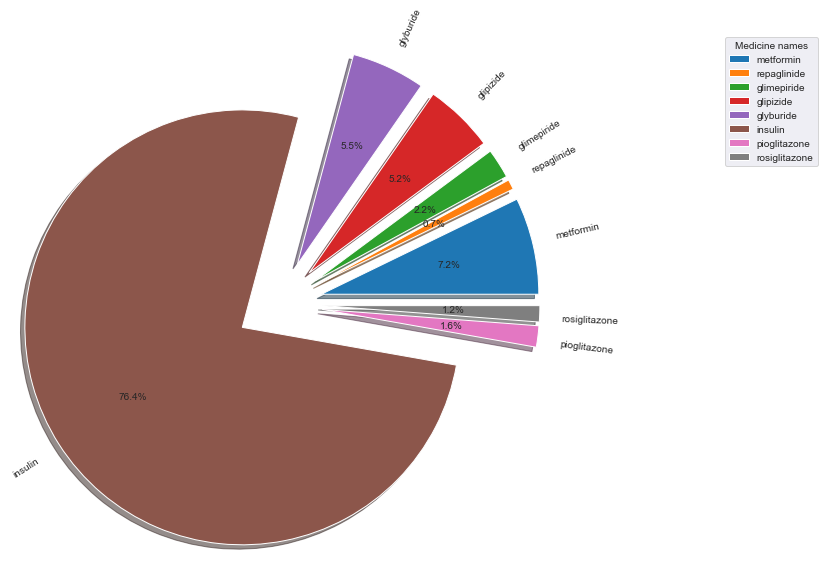

In [90]:
plot_med_stat('Up')

* Insuline dose what increased in most of the cases (76.4%) then followed by metformin. Most of the medicine dose are not even increased.

              total
pioglitazone    118
glimepiride     194
glipizide       560
glyburide       564
metformin       575
insulin       12218


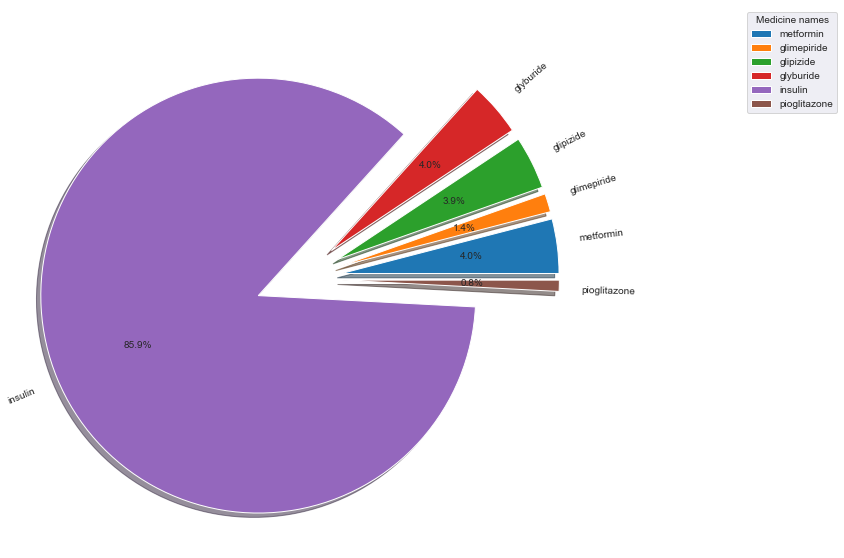

In [91]:
plot_med_stat('Down')

* in most of the cases insuline is reduced followed by metformin and glipizide.

                     total
acarbose               295
nateglinide            668
glyburide-metformin    692
repaglinide           1384
glimepiride           4670
rosiglitazone         6099
pioglitazone          6975
glyburide             9274
glipizide            11355
metformin            18345
insulin              30849


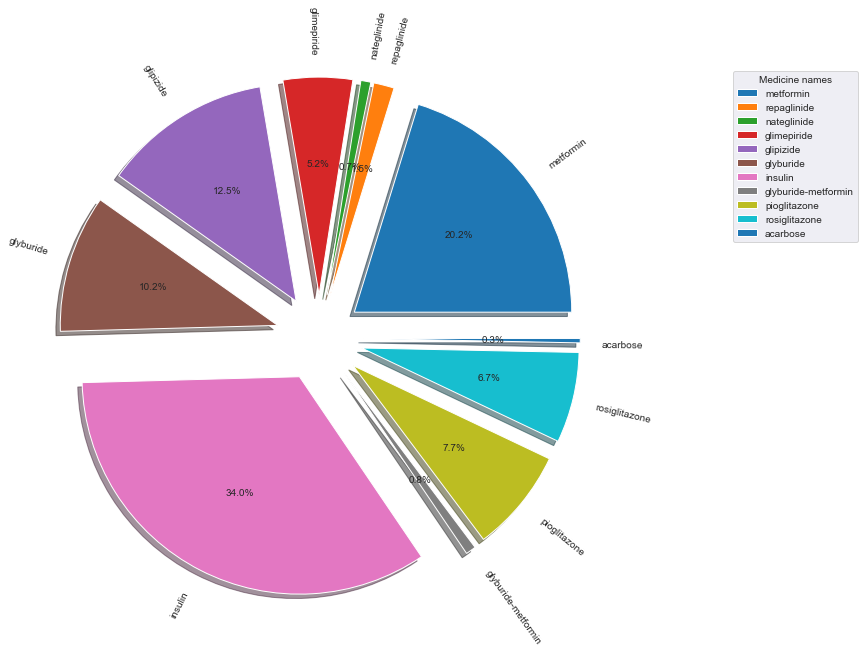

In [92]:
plot_med_stat('Steady')

* Insuline level was kept stedy in most of the cases(34.0%) followed by metformin(20.3%) and glyburide(10.2)

                           total
insulin                    47380
metformin                  81776
glipizide                  89078
glyburide                  91113
pioglitazone               94436
rosiglitazone              95399
glimepiride                96572
repaglinide               100224
glyburide-metformin       101057
nateglinide               101060
acarbose                  101455
chlorpropamide            101677
tolazamide                101724
miglitol                  101725
tolbutamide               101740
glipizide-metformin       101750
troglitazone              101760
metformin-rosiglitazone   101761
acetohexamide             101762
glimepiride-pioglitazone  101762
metformin-pioglitazone    101762
examide                   101763
citoglipton               101763


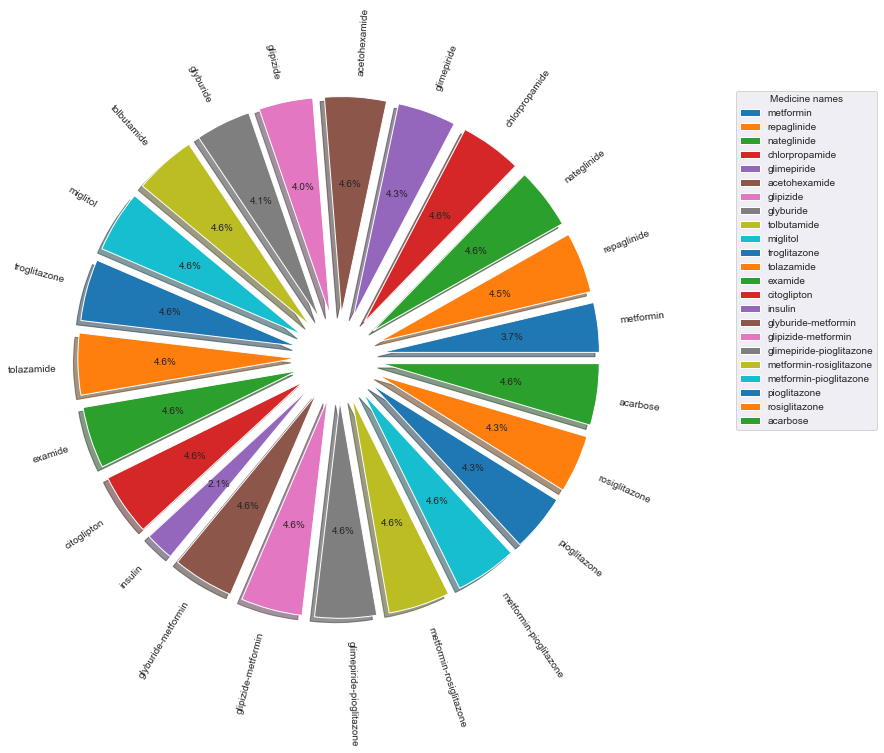

In [93]:
plot_med_stat('No')

* In case of Not prescribed medications. Insuline was least to be not prescribed anf then metformine, rest of the medicine have faces the same results. 
* After this analysis we can state that insuline and metamorfine are most imoportant medicine. 

#### 

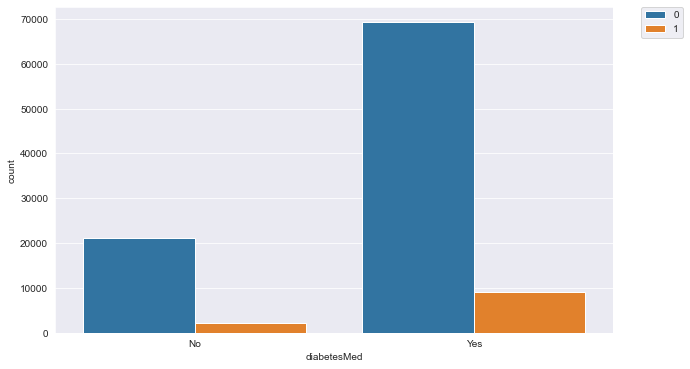

     %age belonging to class 1
Yes                  11.626957
No                    9.597470
     Total observations  %age of total data
Yes               78361            77.00343
No                23402            22.99657


In [94]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="diabetesMed", hue="readmitted", data=diabetes_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('diabetesMed'))
print(val_counts(diabetes_df,'diabetesMed'))

* Almost 78% of Patients whos medicines were changed and they are more prone to getting readmitted.

### Final conclusion after EDA

* There are few features which are important for our analysis but most of the are not that significant for our analysis. Furthere we have to create new features for building better model. 
* Some features have alot of outliers, which are needed to be treated.

In [95]:
diabetes_df.isnull().sum()/len(diabetes_df)*100

race                         0.000000
gender                       0.000000
age                          0.000000
weight                      96.858387
admission_type_id           10.215894
discharge_disposition_id     4.598921
admission_source_id          6.821733
time_in_hospital             0.000000
payer_code                  39.557600
medical_specialty           49.081690
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride 

In [96]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101763 non-null  object
 1   gender                    101763 non-null  object
 2   age                       101763 non-null  int64 
 3   weight                    3197 non-null    object
 4   admission_type_id         91367 non-null   object
 5   discharge_disposition_id  97083 non-null   object
 6   admission_source_id       94821 non-null   object
 7   time_in_hospital          101763 non-null  int64 
 8   payer_code                61508 non-null   object
 9   medical_specialty         51816 non-null   object
 10  num_lab_procedures        101763 non-null  int64 
 11  num_procedures            101763 non-null  int64 
 12  num_medications           101763 non-null  int64 
 13  number_outpatient         101763 non-null  int64 
 14  numb

### Pre-processing

In [97]:
diabetes_df.weight.unique()

array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [98]:
diabetes_df['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', nan, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [99]:
## we will drop medical_speciality and payer_code as it consist of more than 50% of missing values

In [100]:
diabetes_df = diabetes_df.drop(['payer_code','medical_specialty'], axis=1)

In [101]:
diabetes_df['admission_type_id'].mode()

0    Emergency
dtype: object

In [102]:
diabetes_df['admission_type_id'].fillna(diabetes_df['admission_type_id'].mode()[0], inplace = True)

In [103]:
diabetes_df['discharge_disposition_id'].mode()

0    Home
dtype: object

In [104]:
diabetes_df['discharge_disposition_id'].unique()

array([nan, 'Home', 'Discharged/Transfer', 'Other'], dtype=object)

In [105]:
diabetes_df['discharge_disposition_id'].fillna(diabetes_df['discharge_disposition_id'].mode()[0], inplace = True)

In [106]:
diabetes_df['admission_source_id'].unique()

array(['Referral/transfer', 'Emergency', 'Other', nan], dtype=object)

In [107]:
diabetes_df['admission_source_id'].mode()

0    Emergency
dtype: object

In [108]:
diabetes_df['admission_source_id'].fillna(diabetes_df['admission_source_id'].mode()[0], inplace = True)

In [109]:
# weight has more than 96% missing values. So we will just drop it.

In [110]:
diabetes_df.drop(['weight'], axis=1, inplace=True)

In [111]:
diabetes_df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

#### 

#### New features

In [112]:
# procedure_per_med = ( 'num_lab_procedures' + 'num_procedures' )/ 'num_medications


diabetes_df['procedure_per_med'] = (diabetes_df['num_lab_procedures'] + diabetes_df[ 'num_procedures'])/diabetes_df['num_medications']
diabetes_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,procedure_per_med
0,Caucasian,Female,5,Emergency,Home,Referral/transfer,1,41,0,1,...,No,No,No,No,No,No,No,No,0,41.000000
1,Caucasian,Female,15,Emergency,Home,Emergency,3,59,0,18,...,Up,No,No,No,No,No,Ch,Yes,0,3.277778
2,AfricanAmerican,Female,25,Emergency,Home,Emergency,2,11,5,13,...,No,No,No,No,No,No,No,Yes,0,1.230769
3,Caucasian,Male,35,Emergency,Home,Emergency,2,44,1,16,...,Up,No,No,No,No,No,Ch,Yes,0,2.812500
4,Caucasian,Male,45,Emergency,Home,Emergency,1,51,0,8,...,Steady,No,No,No,No,No,Ch,Yes,0,6.375000


In [113]:
#num_med_used = total med - meds which were not prescribed = (23 - meds with 'NO' tag)

In [114]:
# num_med_used = total med - meds which were not prescribed = (23 - meds with 'NO' tag)

In [115]:
from tqdm import tqdm

def count_meds_used():
    meds = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
    count_col = []
    for i in tqdm(range(len(diabetes_df))):
        count = 0
        for med in meds:
            if diabetes_df[med].iloc[i] == 'No':
                count += 1
        count_col.append(23 - count)
    return count_col
diabetes_df['num_med_used'] = count_meds_used()

100%|████████████████████████████████████████████████████████████████████████| 101763/101763 [00:30<00:00, 3371.38it/s]


In [116]:
diabetes_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,procedure_per_med,num_med_used
0,Caucasian,Female,5,Emergency,Home,Referral/transfer,1,41,0,1,...,No,No,No,No,No,No,No,0,41.000000,0
1,Caucasian,Female,15,Emergency,Home,Emergency,3,59,0,18,...,No,No,No,No,No,Ch,Yes,0,3.277778,1
2,AfricanAmerican,Female,25,Emergency,Home,Emergency,2,11,5,13,...,No,No,No,No,No,No,Yes,0,1.230769,1
3,Caucasian,Male,35,Emergency,Home,Emergency,2,44,1,16,...,No,No,No,No,No,Ch,Yes,0,2.812500,1
4,Caucasian,Male,45,Emergency,Home,Emergency,1,51,0,8,...,No,No,No,No,No,Ch,Yes,0,6.375000,2


In [117]:
numerical_df = diabetes_df.select_dtypes(include=[np.number])

In [118]:
numerical_df.drop('readmitted', axis=1, inplace=True)
numerical_df

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,procedure_per_med,num_med_used
0,5,1,41,0,1,0,0,0,1,41.000000,0
1,15,3,59,0,18,0,0,0,9,3.277778,1
2,25,2,11,5,13,2,0,1,6,1.230769,1
3,35,2,44,1,16,0,0,0,7,2.812500,1
4,45,1,51,0,8,0,0,0,5,6.375000,2
...,...,...,...,...,...,...,...,...,...,...,...
101761,75,3,51,0,16,0,0,0,9,3.187500,2
101762,85,5,33,3,18,0,0,1,9,2.000000,1
101763,75,1,53,0,9,1,0,0,13,5.888889,2
101764,85,10,45,2,21,0,0,1,9,2.238095,3


In [119]:
numerical_df

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,procedure_per_med,num_med_used
0,5,1,41,0,1,0,0,0,1,41.000000,0
1,15,3,59,0,18,0,0,0,9,3.277778,1
2,25,2,11,5,13,2,0,1,6,1.230769,1
3,35,2,44,1,16,0,0,0,7,2.812500,1
4,45,1,51,0,8,0,0,0,5,6.375000,2
...,...,...,...,...,...,...,...,...,...,...,...
101761,75,3,51,0,16,0,0,0,9,3.187500,2
101762,85,5,33,3,18,0,0,1,9,2.000000,1
101763,75,1,53,0,9,1,0,0,13,5.888889,2
101764,85,10,45,2,21,0,0,1,9,2.238095,3


In [120]:
num_col = list(set(list(diabetes_df._get_numeric_data().columns))- {'readmitted'})
num_col

['number_diagnoses',
 'num_lab_procedures',
 'number_inpatient',
 'procedure_per_med',
 'num_procedures',
 'age',
 'time_in_hospital',
 'number_outpatient',
 'number_emergency',
 'num_medications',
 'num_med_used']

In [121]:

# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = diabetes_df[i].skew()
    skew_before.append(skewval)
    
    kurtval = diabetes_df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = diabetes_df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        log_type.append('log1p')
        skewvalnew = np.log1p(pd.DataFrame(diabetes_df[diabetes_df[i] >= 0])[i]).skew()
        skew_after.append(skewvalnew)

        kurtvalnew = np.log1p(pd.DataFrame(diabetes_df[diabetes_df[i] >= 0])[i]).kurtosis()
        kurt_after.append(kurtvalnew)

        sdvalnew = np.log1p(pd.DataFrame(diabetes_df[diabetes_df[i] >= 0])[i]).std()
        standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [122]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,number_diagnoses,-0.876799,-0.078883,1.933578,No,NA,-0.876799,-0.078883,1.933578
1,num_lab_procedures,-0.236531,-0.245042,19.674220,No,NA,-0.236531,-0.245042,19.674220
2,number_inpatient,3.614085,20.718836,1.262877,Yes,log1p,1.441917,1.375074,0.511106
3,procedure_per_med,5.904222,70.567970,3.086031,Yes,log1p,0.138101,1.208474,0.521872
4,num_procedures,1.316460,0.857272,1.705792,No,NA,1.316460,0.857272,1.705792
5,age,-0.630507,0.281303,15.941022,No,NA,-0.630507,0.281303,15.941022
6,time_in_hospital,1.134030,0.850342,2.985092,No,NA,1.134030,0.850342,2.985092
7,number_outpatient,8.832837,147.903740,1.267282,Yes,log1p,2.739686,7.851674,0.429351
8,number_emergency,22.855272,1191.654120,0.930485,Yes,log1p,3.653585,16.202195,0.314969
9,num_medications,1.326716,3.468253,8.127589,No,NA,1.326716,3.468253,8.127589


In [123]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        diabetes_df = diabetes_df[diabetes_df[colname] >= 0]
        diabetes_df[colname] = np.log1p(diabetes_df[colname])

In [124]:
diabetes_df['procedure_per_med'].kurt()

1.2084740015388915

In [125]:
diabetes_df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,procedure_per_med,num_med_used
0,Caucasian,Female,5,Emergency,Home,Referral/transfer,1,41,0,1,...,No,No,No,No,No,No,No,0,3.737670,0
1,Caucasian,Female,15,Emergency,Home,Emergency,3,59,0,18,...,No,No,No,No,No,Ch,Yes,0,1.453434,1
2,AfricanAmerican,Female,25,Emergency,Home,Emergency,2,11,5,13,...,No,No,No,No,No,No,Yes,0,0.802346,1
3,Caucasian,Male,35,Emergency,Home,Emergency,2,44,1,16,...,No,No,No,No,No,Ch,Yes,0,1.338285,1
4,Caucasian,Male,45,Emergency,Home,Emergency,1,51,0,8,...,No,No,No,No,No,Ch,Yes,0,1.998096,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75,Emergency,Discharged/Transfer,Emergency,3,51,0,16,...,No,No,No,No,No,Ch,Yes,0,1.432104,2
101762,AfricanAmerican,Female,85,Emergency,Discharged/Transfer,Other,5,33,3,18,...,No,No,No,No,No,No,Yes,0,1.098612,1
101763,Caucasian,Male,75,Emergency,Home,Emergency,1,53,0,9,...,No,No,No,No,No,Ch,Yes,0,1.929910,2
101764,Caucasian,Female,85,Emergency,Discharged/Transfer,Emergency,10,45,2,21,...,No,No,No,No,No,Ch,Yes,0,1.174985,3


## 

In [126]:
categorical_df = diabetes_df.select_dtypes(exclude=[np.number]).columns

categorical_df

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [127]:
import scipy
selected_features =[]


for col in categorical_df : 
    data_crosstab = pd.crosstab(diabetes_df['readmitted'],  
                                diabetes_df[col], 
                                margins = False) 

    stat, p, dof, expected = scipy.stats.chi2_contingency(data_crosstab)
    if p < 0.4 :
        print(p, col, 'is significant')
        selected_features.append(col)
    else:
        print(p, col, 'is not significant')

0.07975149603415049 race is significant
0.35884077972245254 gender is significant
0.0009026250424946944 admission_type_id is significant
1.8710715476420467e-166 discharge_disposition_id is significant
1.8144947192590584e-07 admission_source_id is significant
1.5004738993096024e-16 diag_1 is significant
2.3049372264426937e-08 diag_2 is significant
4.020725136754708e-13 diag_3 is significant
0.0012552517633044478 max_glu_serum is significant
8.226248012446659e-08 A1Cresult is significant
1.0936911695576979e-12 metformin is significant
0.007295458994734808 repaglinide is significant
0.7028757443394432 nateglinide is not significant
0.4332785882619723 chlorpropamide is not significant
0.07337966332272844 glimepiride is significant
0.21739041557160507 acetohexamide is significant
0.00928114178754257 glipizide is significant
0.20109814817054128 glyburide is significant
0.47983842090428896 tolbutamide is not significant
0.09443578158615146 pioglitazone is significant
0.14279012804105173 rosig

In [128]:
selected_features

['race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'insulin',
 'glimepiride-pioglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [129]:
numeric_features = diabetes_df.select_dtypes(include=[np.number]).columns
numeric_features

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted',
       'procedure_per_med', 'num_med_used'],
      dtype='object')

In [130]:
selected_features_n = []

for col in numeric_features :

    
    
    rho , pval = scipy.stats.spearmanr(diabetes_df['readmitted'], diabetes_df[col])
    if pval < 0.4 :
        print(col, 'is significant')
        selected_features_n.append(col)
    else : 
        print(col, 'is not significant')

age is significant
time_in_hospital is significant
num_lab_procedures is significant
num_procedures is significant
num_medications is significant
number_outpatient is significant
number_emergency is significant
number_inpatient is significant
number_diagnoses is significant
readmitted is significant
procedure_per_med is significant
num_med_used is significant


In [131]:
selected_features_n

['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'readmitted',
 'procedure_per_med',
 'num_med_used']

In [132]:
data = pd.concat([diabetes_df[selected_features], diabetes_df[selected_features_n]], axis= 1)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101763 non-null  object 
 1   gender                    101763 non-null  object 
 2   admission_type_id         101763 non-null  object 
 3   discharge_disposition_id  101763 non-null  object 
 4   admission_source_id       101763 non-null  object 
 5   diag_1                    101763 non-null  object 
 6   diag_2                    101763 non-null  object 
 7   diag_3                    101763 non-null  object 
 8   max_glu_serum             101763 non-null  object 
 9   A1Cresult                 101763 non-null  object 
 10  metformin                 101763 non-null  object 
 11  repaglinide               101763 non-null  object 
 12  glimepiride               101763 non-null  object 
 13  acetohexamide             101763 non-null  o

In [134]:
numerics = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
numerics

['number_diagnoses',
 'num_lab_procedures',
 'number_inpatient',
 'procedure_per_med',
 'num_procedures',
 'age',
 'time_in_hospital',
 'number_outpatient',
 'number_emergency',
 'num_medications',
 'num_med_used']

In [135]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['features'].apply(lambda x: data[x].std())
datf['mean'] = datf['features'].apply(lambda x: data[x].mean())

In [136]:
datf

,features,mean
0,number_diagnoses,7.422649
1,num_lab_procedures,43.095909
2,number_inpatient,0.326325
3,procedure_per_med,1.356486
4,num_procedures,1.339691
5,age,65.966854
6,time_in_hospital,4.396018
7,number_outpatient,0.172140
8,number_emergency,0.101915
9,num_medications,16.021835


In [137]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [138]:
data[numerics] = standardize(data[numerics])
import scipy as sp
data = data[(np.abs(sp.stats.zscore(data[numerics])) < 3).all(axis=1)]

In [139]:
data

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,procedure_per_med,num_med_used
2,AfricanAmerican,Female,Emergency,Home,Emergency,Other,Diabetes,Other,None,None,...,-1.631377,2.145823,-0.371802,2.157852,-0.323573,0.717708,-0.735763,0,-1.061836,-0.195289
3,Caucasian,Male,Emergency,Home,Emergency,Other,Diabetes,Circulatory,None,None,...,0.045953,-0.199141,-0.002687,-0.400932,-0.323573,-0.638471,-0.218585,0,-0.034876,-0.195289
4,Caucasian,Male,Emergency,Home,Emergency,Neoplasms,Neoplasms,Diabetes,None,None,...,0.401751,-0.785382,-0.986993,-0.400932,-0.323573,-0.638471,-1.252942,0,1.229446,0.891449
5,Caucasian,Male,Emergency,Home,Referral/transfer,Circulatory,Circulatory,Diabetes,None,None,...,-0.614813,2.732063,-0.002687,-0.400932,-0.323573,-0.638471,0.815772,0,-0.304257,-0.195289
6,Caucasian,Male,Elective,Home,Referral/transfer,Circulatory,Circulatory,Other,None,None,...,1.367486,-0.199141,0.612505,-0.400932,-0.323573,-0.638471,-0.218585,0,0.231438,1.978188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Discharged/Transfer,Emergency,Diabetes,Other,Circulatory,None,>8,...,0.401751,-0.785382,-0.002687,-0.400932,-0.323573,-0.638471,0.815772,0,0.144899,0.891449
101762,AfricanAmerican,Female,Emergency,Discharged/Transfer,Other,Digestive,Other,Digestive,None,None,...,-0.513157,0.973341,0.243390,-0.400932,-0.323573,0.717708,0.815772,0,-0.494134,-0.195289
101763,Caucasian,Male,Emergency,Home,Emergency,Other,Genitourinary,Other,None,None,...,0.503407,-0.785382,-0.863955,1.213481,-0.323573,-0.638471,2.884487,0,1.098789,0.891449
101764,Caucasian,Female,Emergency,Discharged/Transfer,Emergency,Injury,Other,Injury,None,None,...,0.096781,0.387100,0.612505,-0.400932,-0.323573,0.717708,0.815772,0,-0.347789,1.978188


In [140]:
categorical_df = data.select_dtypes(exclude=[np.number]).columns

In [141]:
categorical_df

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'insulin', 'glimepiride-pioglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [142]:
# encoding medications to lower categories


keys = ['metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin'
        , 'glimepiride-pioglitazone', 'metformin-pioglitazone',
        'acetohexamide']
for col in keys:
    data[col] = data[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [143]:
data['miglitol'].unique()

array([0, 1], dtype=int64)

In [144]:
len(data.columns)

37

In [145]:
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

In [146]:
data.select_dtypes(exclude=[np.number]).columns

Index(['race', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult'],
      dtype='object')

In [147]:
data = pd.get_dummies(data, columns=['race', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_1','diag_2', 'diag_3'], drop_first = True)


In [148]:
data

,gender,metformin,repaglinide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,...,diag_2_Other,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Muscoloskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
101762,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
101763,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
101764,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [149]:
#df_pd['number_diagnoses']

In [150]:
#pip install imbalanced-learn

### Modeling

In [151]:
X = data.drop('readmitted', axis=1)
y = data['readmitted']

##### Logistic Regression

In [152]:
#df_pd['readmitted'].value_counts()

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)

LogisticRegression()

In [154]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,2883,2883
1,335,335
All,3218,3218


In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.89
Precision is 0.00
Recall is 0.00


Since our target variable is having class imbalance problem, So will use SMOTE technique to resolve it

In [156]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 64402, 1: 7632})
New dataset shape Counter({0: 64402, 1: 64402})


In [157]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)

LogisticRegression()

In [158]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2263,2291,4554
1,240,286,526
All,2503,2577,5080


In [159]:


print("Accuracy : {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision : {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall : {0:.2f}".format(recall_score(y_test, logit_pred)))
#print("Macro f1 : {0:.2f}".format(f1_score(y_test, logit_pred, average='macro')))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy : 0.78
Precision : 0.78
Recall : 0.79


In [160]:
#logit.summary()

In [161]:
from sklearn import metrics

In [162]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, logit_pred)
cnf_matrix

array([[ 9954,  2847],
       [ 2755, 10205]], dtype=int64)

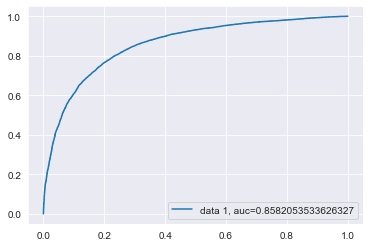

In [163]:
y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

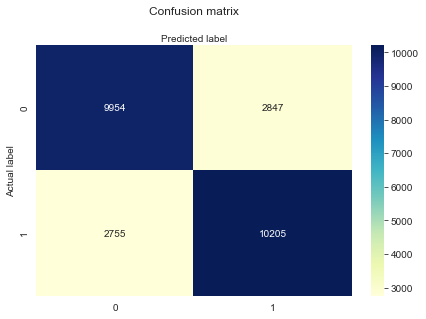

In [164]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [165]:



print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


print('After SMOTE, the shape of train_X: {}'.format(X_train_res.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 51442
Before OverSampling, counts of label '0': 51601 

After SMOTE, the shape of train_X: (103202, 66)
After SMOTE, the shape of train_y: (103202,) 

After SMOTE, counts of label '1': 51601
After SMOTE, counts of label '0': 51601


In [166]:
#pip install xgboost

In [167]:
from xgboost import XGBClassifier

model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

[20:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.00664
Feature: 1, Score: 0.00208
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00097
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00279
Feature: 6, Score: 0.00884
Feature: 7, Score: 0.00153
Feature: 8, Score: 0.00102
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00239
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00182
Feature: 15, Score: 0.01254
Feature: 16, Score: 0.06662
Feature: 17, Score: 0.04931
Feature: 18, Score: 0.00300
Feature: 19, Score: 0.04281
Feature: 20, Score: 0.01010
Feature: 21, Score: 0.00653
Feature: 22, Score: 0.00299
Feature: 23, Score: 0.04082
Feature: 24, Score: 0.02982


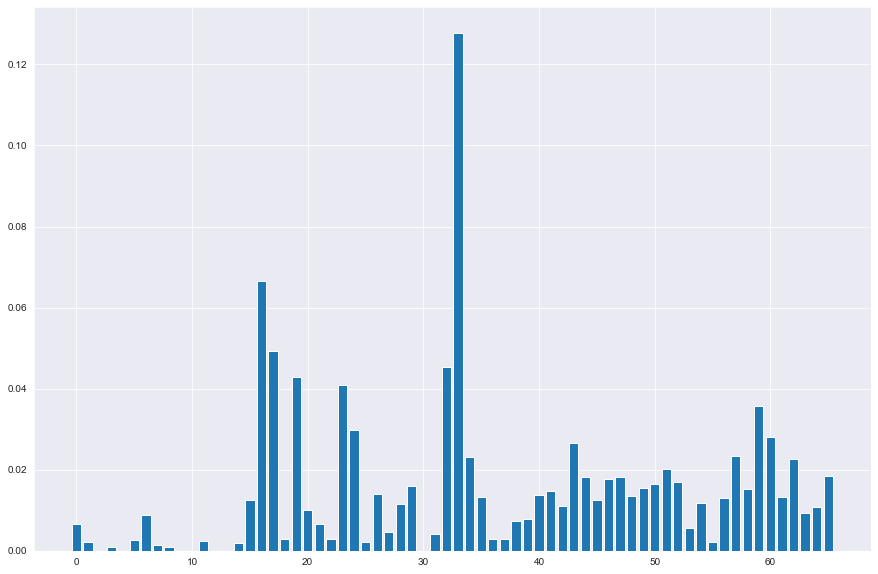

In [168]:
# plot feature importance
fig = plt.figure(figsize=(15,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Observations:
* Majority of the features have zero importance score.
* there are just three features with importance 0.04.

In [169]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
#from xgboost import XGBClassifier
#model = XGBClassifier()
# fit the model
#model.fit(X_train_res, y_train_res)
# get importance
#importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

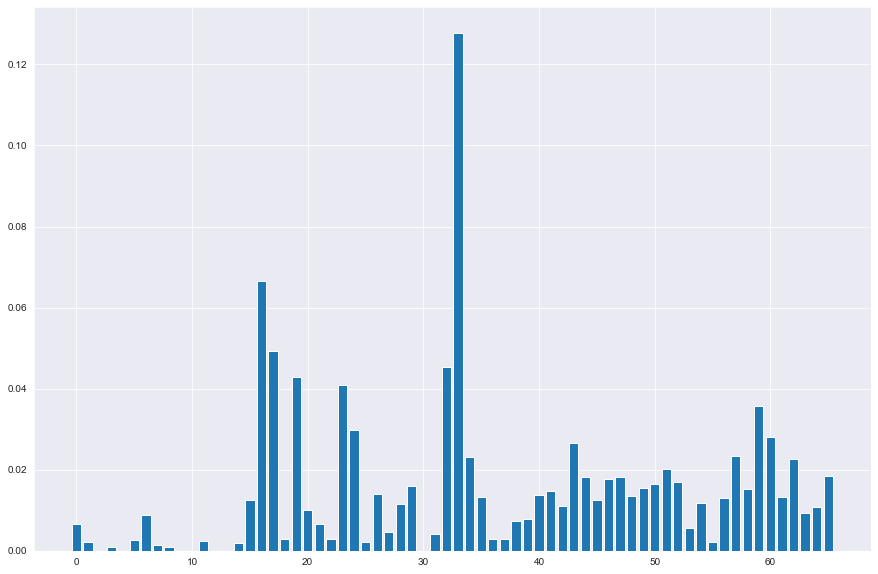

In [170]:
# plot feature importance
fig = plt.figure(figsize=(15,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Observations:
* Feature importance after applying SMOTE changes a lot from that where SMOTE was not applied.
* A lot of features have zero importance.
* Maximum importance seen here is of 0.115.
* There are many features which will not contribute and hence I will remove those features.

In [171]:
feat_selected = []
for i,v in enumerate(importance):
    if v>0.05:
        print(X_train.columns[i])
    if v  > 0:
        feat_selected.append(X_train.columns[i])

age
discharge_disposition_id_Other


In [172]:
print('Out of total {} features, {} features have feature  importance  greater than 0.'.format(len(data.columns),len(feat_selected)))

Out of total 67 features, 59 features have feature  importance  greater than 0.


In [173]:
# set the new independent features for the model.

X_train_res = data[feat_selected]

In [174]:
print(len(X_train_res))
print(len(y))

90043
90043


<AxesSubplot:xlabel='readmitted', ylabel='count'>

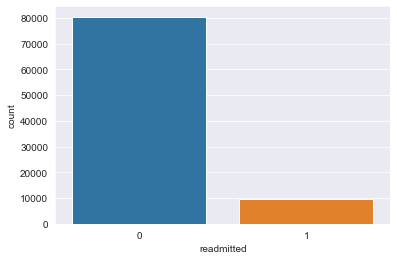

In [175]:
sns.countplot(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train_res, y)
print('New dataset shape {}'.format(Counter(train_output_new)))

X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)

New dataset shape Counter({0: 80486, 1: 80486})


In [ ]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)




c_matrix_test = confusion_matrix(y_test, logit_pred)
y_test_score = logit.predict_proba(X_test)[:,1]

print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test, y_test_score)))

print("Accuracy : {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision : {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall : {0:.2f}".format(recall_score(y_test, logit_pred)))
print("Macro f1 : {0:.2f}".format(f1_score(y_test, logit_pred, average='macro')))

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, logit_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#numerical_df_t= X_train.select_dtypes(include=[np.number])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report, f1_score

In [ ]:
sm = SMOTE(random_state=20)
train_input_o, train_output_o = sm.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))

X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(train_input_o, train_output_o, test_size=0.20, random_state=0)

dt = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dt.fit(X_train_o, y_train)

In [ ]:
y_pred_prob = dt.predict(X_test_o)

c_matrix_test = confusion_matrix(y_test_o, y_pred_prob)
y_test_score = dt.predict_proba(X_test_o)[:,1]

print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test_o, y_test_score)))

print("Accuracy : {0:.2f}".format(accuracy_score(y_test_o, y_pred_prob)))
print("Precision : {0:.2f}".format(precision_score(y_test_o, y_pred_prob)))
print("Recall : {0:.2f}".format(recall_score(y_test_o, y_pred_prob)))
print("Macro f1 : {0:.2f}".format(f1_score(y_test_o, y_pred_prob, average='macro')))

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_o, y_pred_prob)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_o,  y_pred_prob)
auc = metrics.roc_auc_score(y_test_o, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rf.fit(X_train_o, y_train)

y_prob_rf = rf.predict(X_test_o)

y_test_score = rf.predict_proba(X_test_o)[:,1]

print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test_o, y_pred_prob)))

print("Accuracy : {0:.2f}".format(accuracy_score(y_test_o, y_prob_rf)))
print("Precision : {0:.2f}".format(precision_score(y_test_o, y_prob_rf)))
print("Recall : {0:.2f}".format(recall_score(y_test_o, y_prob_rf)))
print("Macro f1 : {0:.2f}".format(f1_score(y_test_o, y_prob_rf, average='macro')))

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_o, y_prob_rf)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_o,  y_prob_rf)
auc = metrics.roc_auc_score(y_test_o, y_prob_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier(learning_rate=0.25, n_estimators=84)
xg.fit(X_train_o, y_train)

y_prob_xgb = xg.predict(X_test_o)

y_test_score = xg.predict_proba(X_test_o)[:,1]

print("Roc-Auc : {0:.2f}".format(roc_auc_score(y_test_o, y_test_score)))

print("Accuracy : {0:.2f}".format(accuracy_score(y_test_o, y_prob_xgb)))
print("Precision : {0:.2f}".format(precision_score(y_test_o, y_prob_xgb)))
print("Recall : {0:.2f}".format(recall_score(y_test_o, y_prob_xgb)))
print("Macro f1 : {0:.2f}".format(f1_score(y_test_o, y_prob_xgb, average='macro')))

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_o,  y_prob_xgb)
auc = metrics.roc_auc_score(y_test_o, y_prob_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_o, y_prob_xgb)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')